**Analyzing Female Bouldering Results in Climbing Competitions for Olympic Qualification Predictions**

First let's load our excel file. 

In [276]:
import pandas as pd

# path to the file
xlsx_path = '/home/sole/Documents/DS/Projecte Final/Boulder_Women.xlsx'

# Import the XLSX file into a DataFrame (df_boulder)
df_boulder = pd.read_excel(xlsx_path)

# Display the DataFrame
print(df_boulder)

                                                 unique  year discipline  \
0     2008;Boulder;Boulder IFSC Climbing Worldcup (B...  2008    Boulder   
1     2008;Boulder;Boulder IFSC Climbing Worldcup (B...  2008    Boulder   
2     2008;Boulder;Boulder IFSC Climbing Worldcup (B...  2008    Boulder   
3     2008;Boulder;Boulder IFSC Climbing Worldcup (B...  2008    Boulder   
4     2008;Boulder;Boulder IFSC Climbing Worldcup (B...  2008    Boulder   
...                                                 ...   ...        ...   
9788                                                NaN  2023    Boulder   
9789                                                NaN  2023    Boulder   
9790                                                NaN  2023    Boulder   
9791                                                NaN  2023    Boulder   
9792                                                NaN  2023    Boulder   

                                            competition gender level   group  \
0     B

In [277]:
df_boulder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9793 entries, 0 to 9792
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unique       9166 non-null   object 
 1   year         9793 non-null   int64  
 2   discipline   9793 non-null   object 
 3   competition  9793 non-null   object 
 4   gender       9793 non-null   object 
 5   level        9793 non-null   object 
 6   group        9793 non-null   object 
 7   name         9793 non-null   object 
 8   number       9752 non-null   object 
 9   country      9793 non-null   object 
 10  top1         9793 non-null   object 
 11  zone1        9793 non-null   object 
 12  top2         9793 non-null   object 
 13  zone2        9793 non-null   object 
 14  top3         9793 non-null   object 
 15  zone3        9793 non-null   object 
 16  top4         9793 non-null   object 
 17  zone4        9793 non-null   object 
 18  top5         6451 non-null   float64
 19  zone5 

**Brief description of the file and columns**

The IFSC_Boulder_Women file is in XLSX format and contains all the results obtained in all bouldering and boulder & lead competitions for all athletes in the qualification rounds, semi-finals and finals between 2008 and 2023 inclusive.

**unique:**  ID that includes the year, discipline, name and date of the competition.
**year:** Year of the competition.
**discipline:** Discipline, in this case it is always Boulder.
**competition:** Name of the competition, year and date.
**gender:** Genre of the athlete, always W, it is called Women.
**level:** Level of competition, that is, Qualifications (W), Semifinals (S) or Finals (F).
**group:** Information about the data group type, here it is always result (R).
**name:** Name and surname of the athlete. All in lowercase to facilitate exploration.
**number:** Participant number attributed to each competition.
**country:** Country of the athlete.
**top1, zone1, top2, zone2, top3, zone3, top4, zone4:** Results of the various rounds. There are always 4 rounds in the Finals.
**top5, zone5, top6, zone6:** Results of the rounds. In qualifications, there may be 5 or 6 rounds, depending on the competition.

NOTE: I would like to note that due to the way IFSC recorded the results, unforeseen circumstances like bad weather, or injury, some events were not always played through completion or recorded properly. For example, on several occasions the weather was so severe that some rounds had to be skipped altogether. The most recent of which was in Seoul 2023, where the rain caused the entire semi-finals and finals to be combined into one. This means that if you qualified for the semi-finals, you were essentially competing in the finals as well.

From the Dtypes of the columns, I can see that some of the climbing ones 'top1, zone1, top2, zone2, top3, zone3, top4, zone4' are object, so I will change them into float64 type for future processing.  

In [278]:
# Columns to convert
columns_to_convert = ['top1', 'zone1', 'top2', 'zone2', 'top3', 'zone3', 'top4', 'zone4']

# Convert the specified columns to float64
df_boulder[columns_to_convert] = df_boulder[columns_to_convert].astype(float)

# Verify the changes
print(df_boulder.dtypes)

unique          object
year             int64
discipline      object
competition     object
gender          object
level           object
group           object
name            object
number          object
country         object
top1           float64
zone1          float64
top2           float64
zone2          float64
top3           float64
zone3          float64
top4           float64
zone4          float64
top5           float64
zone5          float64
top6           float64
zone6          float64
dtype: object


Now that all climbing results variables are float64, let's verify if we have any null values in our dataframe:

In [279]:
print(df_boulder.isnull().sum())

unique          627
year              0
discipline        0
competition       0
gender            0
level             0
group             0
name              0
number           41
country           0
top1              0
zone1             0
top2              0
zone2             0
top3              0
zone3             0
top4              0
zone4             0
top5           3342
zone5          3342
top6           9641
zone6          9641
dtype: int64


We do. Unique and number will not have any impact later on for this exploration so we better just delete them now. Top5 and zone5 have the same amount, which is good because it means there were no 6th boulder to top in that competition, and we have the same number for top6 and zone6 which is to show that we have all the corresponding information for qualifications rounds. 

In [280]:
df_boulder = df_boulder.drop(['unique', 'number'], axis=1)

Now, let's focus on the athletes who will be participating in the Olympic Qualifier of May 2024. I extracted their names from 'Qualified athletes for the Olympic Qualifier Series (OQS) as of 15 December 2023' PDF found in the iFSC website. They are 48 women qualified for the Boulder & Lead. 

Since we will be working with these climbers data, we should extract their results from the overall data and create a new DF for it. 

In [281]:
# List of the 48 athletes qualified for the Shanghai Qualifier Event in May 2024
athletes = [
    "brooke raboutou", "miho nonaka", "chaehyun seo", "jain kim", "vita lukan","mia krampl", "anastasia sanders", "futaba ito", "nonoha kume", "hélène janicot", "manon hily", "ayala kerem", "hannah meul", "stasa gejo", "molly thompson-smith","fanny gibert", "laura rogora", "zhilu luo", "ryu nakagawa", "zélia avezou","ievgeniia kazbekova", "eliska adamovska", "sara copar", "camilla moroni",
    "lucka rakovec", "kyra condie", "lynn van der meer", "lucia dörffel", "giorgia tesio", "petra klingler", "noa shiran", "roxana wienand", "elnaz rekabi", "franziska sterrer", "yejoo seo", "erin mcneice", "aleksandra totkova", "sandra hopfensitz", "alannah yip", "michaela smetanova", "maya stasiuk", "kylie cullen", "martina buršíková", "valentina aguado", "sol sa", "chloe caulier", "tegwen oates", "svana bjarnason"
]
# Let's save it as df_qualified
df_qualified= df_boulder[df_boulder['name'].str.lower().isin(athletes)]

df_qualified.head()  

year discipline                                        competition  \
265  2008    Boulder  Boulder IFSC Climbing Worldcup (B) - Fiera di ...   
307  2008    Boulder  Boulder IFSC Climbing Worldcup (B) - Fiera di ...   
441  2009    Boulder  Boulder IFSC Climbing Worldcup (B) - Kazo (JPN...   
474  2009    Boulder  Boulder IFSC Climbing Worldcup (B) - Kazo (JPN...   
492  2009    Boulder  Boulder IFSC Climbing Worldcup (B) - Kazo (JPN...   

    gender level   group      name country  top1  zone1  top2  zone2  top3  \
265      W     Q  Result  jain kim     KOR   4.0    2.0   5.0    5.0   1.0   
307      W     S  Result  jain kim     KOR   inf    1.0   inf    inf   inf   
441      W     Q  Result  jain kim     KOR   3.0    3.0   1.0    1.0   inf   
474      W     S  Result  jain kim     KOR   1.0    1.0   inf    inf   inf   
492      W     F  Result  jain kim     KOR   inf    3.0   2.0    2.0   3.0   

     zone3  top4  zone4  top5  zone5  top6  zone6  
265    1.0   inf    1.0   inf    3.0   NaN    NaN  
307    3.0   inf    2.0   NaN    NaN   NaN    NaN  
441    2.0   1.0    1.0   2.0    2.0   NaN    NaN  
474    2.0   2.0    1.0   NaN    NaN   NaN    NaN  
492    1.0   inf    inf   NaN    NaN   NaN    NaN

Apparently there are some missing values, 3 for top5 zone5 and 5 for top6 zone6. 

In [282]:
# Checking for missing values in the specified columns
missing_values = df_qualified[df_qualified[['top5', 'zone5', 'top6', 'zone6']].isnull().any(axis=1)]

# Display rows with missing values
print(missing_values)

      year discipline                                        competition  \
265   2008    Boulder  Boulder IFSC Climbing Worldcup (B) - Fiera di ...   
307   2008    Boulder  Boulder IFSC Climbing Worldcup (B) - Fiera di ...   
441   2009    Boulder  Boulder IFSC Climbing Worldcup (B) - Kazo (JPN...   
474   2009    Boulder  Boulder IFSC Climbing Worldcup (B) - Kazo (JPN...   
492   2009    Boulder  Boulder IFSC Climbing Worldcup (B) - Kazo (JPN...   
...    ...        ...                                                ...   
9788  2023    Boulder  Boulder IFSC World Championships Bern 2023 1-1...   
9789  2023    Boulder  Boulder IFSC World Championships Bern 2023 1-1...   
9790  2023    Boulder  Boulder IFSC World Championships Bern 2023 1-1...   
9791  2023    Boulder  Boulder IFSC World Championships Bern 2023 1-1...   
9792  2023    Boulder  Boulder IFSC World Championships Bern 2023 1-1...   

     gender level   group                  name country  top1  zone1  top2  \
265      

It seems that there is no real missing value, since we extracted some athletes data from the overall competitions information, they all competed in events with different structures where there were not necessarily a 5th or 6th boulder problem to top. 

In [283]:
df_qualified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1869 entries, 265 to 9792
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         1869 non-null   int64  
 1   discipline   1869 non-null   object 
 2   competition  1869 non-null   object 
 3   gender       1869 non-null   object 
 4   level        1869 non-null   object 
 5   group        1869 non-null   object 
 6   name         1869 non-null   object 
 7   country      1869 non-null   object 
 8   top1         1869 non-null   float64
 9   zone1        1869 non-null   float64
 10  top2         1869 non-null   float64
 11  zone2        1869 non-null   float64
 12  top3         1869 non-null   float64
 13  zone3        1869 non-null   float64
 14  top4         1869 non-null   float64
 15  zone4        1869 non-null   float64
 16  top5         1002 non-null   float64
 17  zone5        1002 non-null   float64
 18  top6         9 non-null      float64
 19  zone

The new Dataframe has a clean structure and follows the same structure as before to I will save it. 

In [284]:
# Let's save this new DF as an XLSX file
file_path = '/home/sole/Documents/DS/Projecte Final/df_qualified.xlsx'  

# Save the DataFrame to an XLSX file
df_qualified.to_excel(file_path, index=False)  

print(f'DataFrame "df_qualified" has been saved to {file_path}')

DataFrame "df_qualified" has been saved to /home/sole/Documents/DS/Projecte Final/df_qualified.xlsx


In [285]:
from itables import init_notebook_mode

# Initialize interactive notebook mode
init_notebook_mode(all_interactive=False)

# Function to calculate statistics
def athlete_statistics(df, non_standard_comps):
    min_year = df['year'].min()
    max_year = df['year'].max()
    qualification_count = (df['level'] == 'Q').sum()
    semi_final_count = (df['level'] == 'S').sum()
    final_count = (df['level'] == 'F').sum()

    # Adjust qualification count if final count is higher
    if final_count > qualification_count:
        qualification_count = final_count

    # Calculate percentages
    semi_final_percentage = (semi_final_count / qualification_count * 100) if qualification_count > 0 else 0
    final_percentage = (final_count / qualification_count * 100) if qualification_count > 0 else 0

    # Career length category
    career_length_years = max_year - min_year + 1
    if career_length_years <= 2:
        career_length = '1-2 years'
    elif career_length_years <= 5:
        career_length = '3-5 years'
    elif career_length_years <= 8:
        career_length = '6-8 years'
    elif career_length_years <= 12:
        career_length = '9-12 years'
    else:
        career_length = '12-15 years'

    return pd.Series({
        'country': df['country'].iloc[0],
        'active years': f"{min_year}-{max_year}",
        'career length': career_length,
        'qualification participations': qualification_count,
        'semi final participations': semi_final_count,
        'final participations': final_count,
        'semi final percentage': f"{semi_final_percentage:.2f}%",
        'final percentage': f"{final_percentage:.2f}%"
    })

# Identifying competitions that are non-standard (without a Semi-Final round)
competitions_without_S = df_qualified.groupby('competition')['level'].unique().apply(lambda x: ', '.join(sorted(x)))
non_standard_competitions_list = competitions_without_S[~competitions_without_S.str.contains('S')].index.tolist()

# Apply the function to calculate statistics for each athlete
athlete_stats = df_qualified.groupby('name').apply(athlete_statistics, non_standard_comps=non_standard_competitions_list)

# Reorder columns
columns_order = ['country', 'active years', 'career length', 'qualification participations',
                 'semi final participations', 'final participations', 'semi final percentage', 'final percentage']
athlete_stats = athlete_stats[columns_order].reset_index().rename(columns={'index': 'name'})

# Display the interactive table
athlete_stats

<IPython.core.display.Javascript object>

name country active years career length  \
0            alannah yip     CAN    2011-2023   12-15 years   
1     aleksandra totkova     BUL    2022-2023     1-2 years   
2      anastasia sanders     USA    2023-2023     1-2 years   
3            ayala kerem     ISR    2020-2023     3-5 years   
4        brooke raboutou     USA    2017-2023     6-8 years   
5         camilla moroni     ITA    2019-2023     3-5 years   
6           chaehyun seo     KOR    2019-2023     3-5 years   
7          chloe caulier     BEL    2012-2023    9-12 years   
8       eliska adamovska     CZE    2019-2023     3-5 years   
9           elnaz rekabi     IRI    2014-2023    9-12 years   
10          erin mcneice     GBR    2022-2023     1-2 years   
11          fanny gibert     FRA    2011-2023   12-15 years   
12     franziska sterrer     AUT    2015-2023    9-12 years   
13            futaba ito     JPN    2018-2023     6-8 years   
14         giorgia tesio     ITA    2016-2023     6-8 years   
15           hannah meul     GER    2017-2023     6-8 years   
16        hélène janicot     FRA    2013-2023    9-12 years   
17   ievgeniia kazbekova     UKR    2012-2023    9-12 years   
18              jain kim     KOR    2008-2023   12-15 years   
19          kylie cullen     USA    2021-2023     3-5 years   
20           kyra condie     USA    2013-2023    9-12 years   
21          laura rogora     ITA    2019-2023     3-5 years   
22         lucia dörffel     GER    2016-2023     6-8 years   
23         lucka rakovec     SLO    2019-2023     3-5 years   
24     lynn van der meer     NED    2021-2023     3-5 years   
25            manon hily     FRA    2014-2023    9-12 years   
26     martina buršíková     SVK    2023-2023     1-2 years   
27          maya stasiuk     AUS    2023-2023     1-2 years   
28            mia krampl     SLO    2018-2023     6-8 years   
29    michaela smetanova     CZE    2019-2023     3-5 years   
30           miho nonaka     JPN    2014-2023    9-12 years   
31  molly thompson-smith     GBR    2017-2023     6-8 years   
32            noa shiran     ISR    2020-2023     3-5 years   
33           nonoha kume     JPN    2023-2023     1-2 years   
34        petra klingler     SUI    2009-2023   12-15 years   
35        roxana wienand     GER    2017-2023     6-8 years   
36          ryu nakagawa     JPN    2021-2023     3-5 years   
37     sandra hopfensitz     GER    2022-2023     1-2 years   
38            sara copar     SLO    2022-2023     1-2 years   
39                sol sa     KOR    2011-2023   12-15 years   
40            stasa gejo     SRB    2013-2023    9-12 years   
41       svana bjarnason     ISL    2023-2023     1-2 years   
42          tegwen oates     RSA    2023-2023     1-2 years   
43      valentina aguado     ARG    2017-2023     6-8 years   
44            vita lukan     SLO    2017-2023     6-8 years   
45             yejoo seo     KOR    2022-2023     1-2 years   
46             zhilu luo     CHN    2022-2023     1-2 years   
47          zélia avezou     FRA    2022-2023     1-2 years   

    qualification participations  semi final participations  \
0                             40                         20   
1                             13                          0   
2                              7                          6   
3                             19                         15   
4                             27                         19   
5                             21                         17   
6                             18                         15   
7                             59                         28   
8                             12                          2   
9                             20                          9   
10                             9                          2   
11                            60                         44   
12                            36                         18   
13                            32                  

In [286]:
# Let's save it as a CSV file
athlete_stats.to_csv('athlete_stats.csv', index=False)

The columns in the displayed interactive table provide information about athlete statistics related to their participation in different competition levels, active years, and country. Here's an explanation of each column:

Country: This column represents the country of each athlete. Each row displays the country to which the athlete belongs.
Active Years: This column shows the range of active years for each athlete. It indicates the years during which the athlete participated in competitions. The format is 'YYYY-YYYY,' where the first 'YYYY' represents the earliest year of participation, and the second 'YYYY' represents the latest year of participation.
Qualification Participations: This column displays the total number of times each athlete participated in the Qualification round of competitions.
Semi-Final Participations: This column shows the total number of times each athlete participated in the Semi-Final round of competitions.
Final Participations: This column indicates the total number of times each athlete reached the Final round of competitions.
Qualification Percentage: This percentage represents the rate of participation in the qualification rounds. This implies an assumption that every athlete has participated in at least one qualification round. Therefore, the percentage is always 100%, indicating full participation.
Semi-Final Percentage: This percentage is calculated based on the athlete's transition from qualification rounds to semi-final rounds. It's computed as (Number of Semi-Final Participations / Number of Qualification Participations) * 100. This metric indicates the success rate of an athlete in progressing from the qualification rounds to the semi-finals.
Final Percentage: This percentage reflects the athlete's success in reaching the final rounds in relation to their qualification attempts. It's calculated as (Number of Final Participations / Number of Qualification Participations) * 100. In this calculation, the final participation is compared directly to the qualification participation, providing a measure of how often an athlete reaches the final round from all their qualification attempts.
These columns collectively provide a comprehensive view of each athlete's competition history, including their participation counts, active years, and the distribution of their participation across different competition levels. The percentages particularly give a sense of how frequently an athlete moves from earlier rounds (qualification) to later stages (semi-finals, finals) in competitions.

With these new variables, let's see the relationship between experience and success: 
This analysis would look into whether there is a correlation between the number of years an athlete has been active and their success in competitions (measured by semi-final and final participation percentages). This requires creating a new feature indicating the number of active years for each athlete and then analyzing its relationship with their competition success rates.
Since quite a few athletes who will be competing for the qualifying ticket are quite new to competitions, I will categorize the athletes' active years with the career lengths categorized as '1-2 years', '3-5 years', '6-8 years', '9-12 years', and '12-15 years'. 

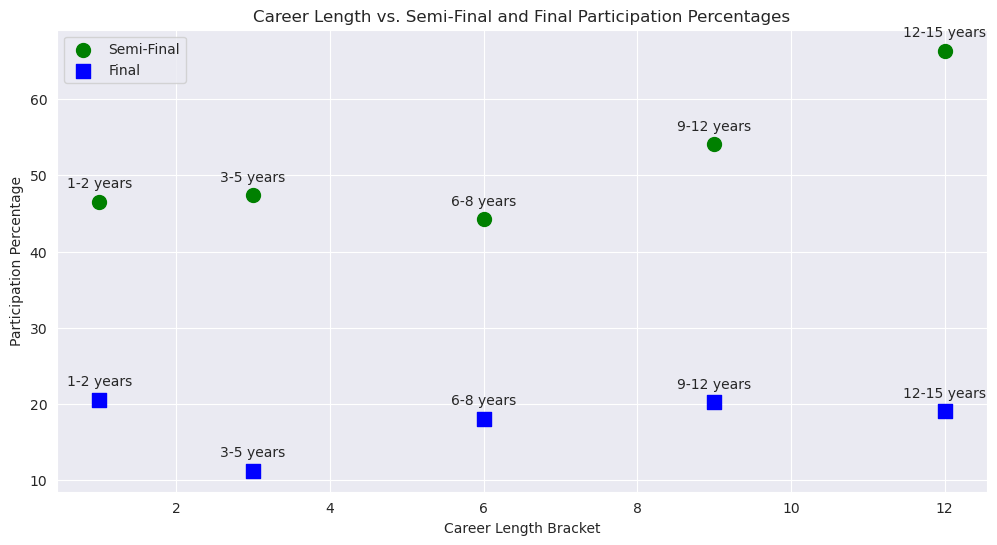

In [287]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert 'semi final percentage' and 'final percentage' to strings if they are not already
if athlete_stats['semi final percentage'].dtype != 'object':
    athlete_stats['semi final percentage'] = athlete_stats['semi final percentage'].astype(str)
if athlete_stats['final percentage'].dtype != 'object':
    athlete_stats['final percentage'] = athlete_stats['final percentage'].astype(str)

# Remove percentage signs and convert to numeric
athlete_stats['semi final percentage'] = pd.to_numeric(athlete_stats['semi final percentage'].str.replace('%', ''), errors='coerce')
athlete_stats['final percentage'] = pd.to_numeric(athlete_stats['final percentage'].str.replace('%', ''), errors='coerce')

# Group by career length and calculate the average percentages
grouped_data = athlete_stats.groupby('career length').mean(numeric_only=True)[['semi final percentage', 'final percentage']].reset_index()

# Extract the numeric value from the 'career length' for plotting
grouped_data['years_numeric'] = grouped_data['career length'].str.extract(r'(\d+)').astype(int)

# Create a side-by-side scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(grouped_data['years_numeric'], grouped_data['semi final percentage'], s=100, c='g', marker='o', label='Semi-Final')
plt.scatter(grouped_data['years_numeric'], grouped_data['final percentage'], s=100, c='b', marker='s', label='Final')

# Customize the plot
plt.title('Career Length vs. Semi-Final and Final Participation Percentages')
plt.xlabel('Career Length Bracket')
plt.ylabel('Participation Percentage')
plt.grid(True)
plt.legend()

# Annotate data points with career length labels
for i, row in grouped_data.iterrows():
    plt.annotate(row['career length'], (row['years_numeric'], row['semi final percentage']), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(row['career length'], (row['years_numeric'], row['final percentage']), textcoords="offset points", xytext=(0,10), ha='center')

# Show the plot
plt.show()

Key findings from these results:

Individuals with a career length of "12-15 years" have the highest average success rate in semifinals, with approximately 66.35%.
However, they have a relatively lower average success rate in finals, at approximately 19.09%.

Individuals with a career length of "3-5 years" have a relatively low average success rate in both semifinals and finals.

Those with a career length of "9-12 years" have a relatively high average success rate in finals compared to others, at approximately 20.21%.

The "1-2 years" and "6-8 years" career length categories have varying success rates in both semifinals and finals, with no clear trend.

In [288]:
# same outcome without visualization
import pandas as pd

# Convert 'semi final percentage' and 'final percentage' to strings if they are not already
if athlete_stats['semi final percentage'].dtype != 'object':
    athlete_stats['semi final percentage'] = athlete_stats['semi final percentage'].astype(str)
if athlete_stats['final percentage'].dtype != 'object':
    athlete_stats['final percentage'] = athlete_stats['final percentage'].astype(str)

# Remove percentage signs and convert to numeric
athlete_stats['semi final percentage'] = pd.to_numeric(athlete_stats['semi final percentage'].str.replace('%', ''), errors='coerce')
athlete_stats['final percentage'] = pd.to_numeric(athlete_stats['final percentage'].str.replace('%', ''), errors='coerce')

# Group by career length and calculate the average percentages
grouped_data = athlete_stats.groupby('career length').mean(numeric_only=True)[['semi final percentage', 'final percentage']].reset_index()

# Display the grouped data
grouped_data

career length  semi final percentage  final percentage
0     1-2 years              46.540000         20.565385
1   12-15 years              66.354000         19.090000
2     3-5 years              47.389091         11.229091
3     6-8 years              44.217000         18.052000
4    9-12 years              54.081111         20.208889

I would like to know from this list of 48 climbers, who ever got in the top 5 position in competitions. To do so, I will have to bring my df_boulder back, and will run a code to get the top 5 climbers for each competition. This way the calculations are correct, because later on I will exclude all other climbers to only work with my 48 qualified athletes. 

In [289]:
# Perfect score for comparison
perfect_score = 8  # 4 tops and 4 zones

# Calculate score and select top 5 athletes for each competition in finals
top_athletes = (
    df_boulder[df_boulder['level'] == 'F']
    .assign(
        score=lambda x: perfect_score - x[['top1', 'zone1', 'top2', 'zone2', 'top3', 'zone3', 'top4', 'zone4']].sum(axis=1)
    )
    .sort_values(by=['competition', 'score'])
    .groupby('competition').head(5)
    .assign(
        position=lambda x: x.groupby('competition').cumcount() + 1
    )
)

# Map index numbers to positions
position_map = {1: '1st', 2: '2nd', 3: '3rd', 4: '4th', 5: '5th'}
top_athletes['position'] = top_athletes['position'].map(position_map)

# Selecting required columns
columns = ['competition', 'name', 'country', 'position', 'top1', 'zone1', 'top2', 'zone2', 'top3', 'zone3', 'top4', 'zone4']
top_athletes = top_athletes[columns]

# Displaying the result
top_athletes

competition             name  \
9340  Boulder & Lead IFSC World Championships Bern 2...   janja garnbret   
9341  Boulder & Lead IFSC World Championships Bern 2...  brooke raboutou   
9342  Boulder & Lead IFSC World Championships Bern 2...     jessica pilz   
9343  Boulder & Lead IFSC World Championships Bern 2...   oriane bertone   
9344  Boulder & Lead IFSC World Championships Bern 2...      miho nonaka   
...                                                 ...              ...   
6981  Lead • Speed • Boulder • Combined IFSC Europe ...       stasa gejo   
6982  Lead • Speed • Boulder • Combined IFSC Europe ...    lucia dörffel   
6983  Lead • Speed • Boulder • Combined IFSC Europe ...   alma bestvater   
6984  Lead • Speed • Boulder • Combined IFSC Europe ...       afra hönig   
6980  Lead • Speed • Boulder • Combined IFSC Europe ...    chloe caulier   

     country position  top1  zone1  top2  zone2  top3  zone3  top4  zone4  
9340     SLO      1st   1.0    1.0   2.0    1.0   1.0    1.0   inf    1.0  
9341     USA      2nd   1.0    1.0   2.0    2.0   inf    1.0   inf    2.0  
9342     AUT      3rd   2.0    1.0   4.0    4.0   inf    1.0   inf    7.0  
9343     FRA      4th   inf    2.0   3.0    2.0   inf    1.0   inf    1.0  
9344     JPN      5th   inf    3.0   inf    1.0   inf    4.0   2.0    1.0  
...      ...      ...   ...    ...   ...    ...   ...    ...   ...    ...  
6981     SRB      1st   inf    1.0   1.0    1.0   inf    1.0   3.0    1.0  
6982     GER      2nd   2.0    1.0   1.0    1.0   inf    1.0   inf    inf  
6983     GER      3rd   2.0    1.0   inf    1.0   inf    1.0   inf    6.0  
6984     GER      4th   inf    1.0   4.0    1.0   inf    2.0   inf    inf  
6980     BEL      5th   1.0    1.0   1.0    1.0   1.0    1.0   3.0    3.0  

[620 rows x 12 columns]

Now that we have this list, let's just keep the variable with the results for the 48 qualified climbers. 

In [290]:
# List of 48 qualified climbers
selected_climbers = [
    "brooke raboutou", "miho nonaka", "chaehyun seo", "jain kim", "vita lukan",
    "mia krampl", "anastasia sanders", "futaba ito", "nonoha kume", "hélène janicot",
    "manon hily", "ayala kerem", "hannah meul", "stasa gejo", "molly thompson-smith",
    "fanny gibert", "laura rogora", "zhilu luo", "ryu nakagawa", "zélia avezou",
    "ievgeniia kazbekova", "eliska adamovska", "sara copar", "camilla moroni",
    "lucka rakovec", "kyra condie", "lynn van der meer", "lucia dörffel", "giorgia tesio",
    "petra klingler", "noa shiran", "roxana wienand", "elnaz rekabi", "franziska sterrer",
    "yejoo seo", "erin mcneice", "aleksandra totkova", "sandra hopfensitz", "alannah yip",
    "michaela smetanova", "maya stasiuk", "kylie cullen", "martina buršíková",
    "valentina aguado", "sol sa", "chloe caulier", "tegwen oates", "svana bjarnason"
]

# Filter top_athletes to include only the selected climbers, using lowercase for matching
top_selected_climbers = top_athletes[top_athletes['name'].str.lower().isin([c.lower() for c in selected_climbers])]

# Displaying the result
top_selected_climbers

competition             name  \
9341  Boulder & Lead IFSC World Championships Bern 2...  brooke raboutou   
9344  Boulder & Lead IFSC World Championships Bern 2...      miho nonaka   
9191        Boulder FSC Asian Cup Riyadh 2023 12-16 Dec     elnaz rekabi   
8251  Boulder IFSC - Climbing World Cup (B&L) - Mori...      miho nonaka   
8252  Boulder IFSC - Climbing World Cup (B&L) - Mori...     chaehyun seo   
...                                                 ...              ...   
7456  Lead • Speed • Boulder • Combined IFSC - Climb...  brooke raboutou   
7453  Lead • Speed • Boulder • Combined IFSC - Climb...   camilla moroni   
6981  Lead • Speed • Boulder • Combined IFSC Europe ...       stasa gejo   
6982  Lead • Speed • Boulder • Combined IFSC Europe ...    lucia dörffel   
6980  Lead • Speed • Boulder • Combined IFSC Europe ...    chloe caulier   

     country position  top1  zone1  top2  zone2  top3  zone3  top4  zone4  
9341     USA      2nd   1.0    1.0   2.0    2.0   inf    1.0   inf    2.0  
9344     JPN      5th   inf    3.0   inf    1.0   inf    4.0   2.0    1.0  
9191     IRI      2nd   2.0    2.0   inf    1.0   2.0    2.0   inf    1.0  
8251     JPN      1st   inf    1.0   1.0    1.0   2.0    1.0   inf    1.0  
8252     KOR      2nd   3.0    2.0   inf    inf   1.0    1.0   inf    1.0  
...      ...      ...   ...    ...   ...    ...   ...    ...   ...    ...  
7456     USA      3rd   2.0    1.0   1.0    1.0   inf    inf   inf    2.0  
7453     ITA      5th   3.0    1.0   1.0    1.0   7.0    7.0   2.0    2.0  
6981     SRB      1st   inf    1.0   1.0    1.0   inf    1.0   3.0    1.0  
6982     GER      2nd   2.0    1.0   1.0    1.0   inf    1.0   inf    inf  
6980     BEL      5th   1.0    1.0   1.0    1.0   1.0    1.0   3.0    3.0  

[181 rows x 12 columns]

In [291]:
# Saving it as a CSV file
top_selected_climbers.to_csv('top_selected_climbers.csv', index=False)

Now that we have this new variable, let's add the columns Podium, 1st, 2nd, 3rd, 4th and 5th to see how often any of the qualified athletes got any of those spots in competitions before. We will also come up with a new variable that I decided to call 'Extended Podium', this variable will show how often an athletes ended up in the top 5 positions. Note that in finals, usually there are 8 to 6 competitors. 

In [292]:
import pandas as pd
from itables import init_notebook_mode

init_notebook_mode(all_interactive=False)

# Function to calculate career length category
def calculate_career_length(min_year, max_year):
    career_length_years = max_year - min_year + 1
    if career_length_years <= 2:
        return '1-2 years'
    elif career_length_years <= 5:
        return '3-5 years'
    elif career_length_years <= 8:
        return '6-8 years'
    elif career_length_years <= 12:
        return '9-12 years'
    else:
        return '12+ years'

# Updated function to calculate basic performance statistics, career length, and competition experience
def athlete_statistics(df):
    min_year = df['year'].min()
    max_year = df['year'].max()
    qualification_count = (df['level'] == 'Q').sum()
    semi_final_count = (df['level'] == 'S').sum()
    final_count = (df['level'] == 'F').sum()
    semi_final_percentage = (semi_final_count / qualification_count * 100) if qualification_count > 0 else 0
    final_percentage = (final_count / qualification_count * 100) if qualification_count > 0 else 0
    competition_experience = df['competition'].nunique()  # Count of unique competitions

    return pd.Series({
        'qualification participations': qualification_count,
        'semi-final participations': semi_final_count,
        'final participations': final_count,
        'semi-final percentage': f"{semi_final_percentage:.2f}%",
        'final percentage': f"{final_percentage:.2f}%",
        'active years': f"{min_year}-{max_year}",
        'career length': calculate_career_length(min_year, max_year),
        'competition experience': competition_experience,  # New column added
        'country': df['country'].iloc[0]  # Assuming country is the same for all rows
    })

# Assuming df_qualified is your DataFrame which should be defined earlier
# Calculate basic performance statistics for each athlete
athlete_stats = df_qualified.groupby('name').apply(athlete_statistics)

# Assuming top_selected_climbers is another DataFrame which should be defined earlier
# Count placements including podiums and extended podiums (top 5 positions)
placements = top_selected_climbers.groupby('name')['position'].value_counts().unstack(fill_value=0)
placements['podiums'] = placements[['1st', '2nd', '3rd']].sum(axis=1)
placements['extended podiums'] = placements[['1st', '2nd', '3rd', '4th', '5th']].sum(axis=1)
placements = placements[['podiums', 'extended podiums', '1st', '2nd', '3rd', '4th', '5th']].astype(int)

# Merge placements with athlete_stats
athlete_stats_with_placements = athlete_stats.merge(placements, left_index=True, right_index=True, how='left').fillna(0)

# Reorder columns to include the new 'competition experience' column
columns_order = ['country', 'active years', 'career length', 'competition experience',
                 'qualification participations', 'semi-final participations', 'final participations',
                 'semi-final percentage', 'final percentage', 'podiums', 'extended podiums',
                 '1st', '2nd', '3rd', '4th', '5th']
athlete_stats_with_placements = athlete_stats_with_placements.reindex(columns=columns_order).reset_index().rename(columns={'index': 'name'})

# Display the updated DataFrame
athlete_stats_with_placements

<IPython.core.display.Javascript object>

name country active years career length  \
0            alannah yip     CAN    2011-2023     12+ years   
1     aleksandra totkova     BUL    2022-2023     1-2 years   
2      anastasia sanders     USA    2023-2023     1-2 years   
3            ayala kerem     ISR    2020-2023     3-5 years   
4        brooke raboutou     USA    2017-2023     6-8 years   
5         camilla moroni     ITA    2019-2023     3-5 years   
6           chaehyun seo     KOR    2019-2023     3-5 years   
7          chloe caulier     BEL    2012-2023    9-12 years   
8       eliska adamovska     CZE    2019-2023     3-5 years   
9           elnaz rekabi     IRI    2014-2023    9-12 years   
10          erin mcneice     GBR    2022-2023     1-2 years   
11          fanny gibert     FRA    2011-2023     12+ years   
12     franziska sterrer     AUT    2015-2023    9-12 years   
13            futaba ito     JPN    2018-2023     6-8 years   
14         giorgia tesio     ITA    2016-2023     6-8 years   
15           hannah meul     GER    2017-2023     6-8 years   
16        hélène janicot     FRA    2013-2023    9-12 years   
17   ievgeniia kazbekova     UKR    2012-2023    9-12 years   
18              jain kim     KOR    2008-2023     12+ years   
19          kylie cullen     USA    2021-2023     3-5 years   
20           kyra condie     USA    2013-2023    9-12 years   
21          laura rogora     ITA    2019-2023     3-5 years   
22         lucia dörffel     GER    2016-2023     6-8 years   
23         lucka rakovec     SLO    2019-2023     3-5 years   
24     lynn van der meer     NED    2021-2023     3-5 years   
25            manon hily     FRA    2014-2023    9-12 years   
26     martina buršíková     SVK    2023-2023     1-2 years   
27          maya stasiuk     AUS    2023-2023     1-2 years   
28            mia krampl     SLO    2018-2023     6-8 years   
29    michaela smetanova     CZE    2019-2023     3-5 years   
30           miho nonaka     JPN    2014-2023    9-12 years   
31  molly thompson-smith     GBR    2017-2023     6-8 years   
32            noa shiran     ISR    2020-2023     3-5 years   
33           nonoha kume     JPN    2023-2023     1-2 years   
34        petra klingler     SUI    2009-2023     12+ years   
35        roxana wienand     GER    2017-2023     6-8 years   
36          ryu nakagawa     JPN    2021-2023     3-5 years   
37     sandra hopfensitz     GER    2022-2023     1-2 years   
38            sara copar     SLO    2022-2023     1-2 years   
39                sol sa     KOR    2011-2023     12+ years   
40            stasa gejo     SRB    2013-2023    9-12 years   
41       svana bjarnason     ISL    2023-2023     1-2 years   
42          tegwen oates     RSA    2023-2023     1-2 years   
43      valentina aguado     ARG    2017-2023     6-8 years   
44            vita lukan     SLO    2017-2023     6-8 years   
45             yejoo seo     KOR    2022-2023     1-2 years   
46             zhilu luo     CHN    2022-2023     1-2 years   
47          zélia avezou     FRA    2022-2023     1-2 years   

    competition experience  qualification participations  \
0                       40                            40   
1                       12                            13   
2                        9                             7   
3                       20                            19   
4                       30                            27   
5                       22                            21   
6                       20                            18   
7                       58                            59   
8                       11                            12   
9                       21                            20   
10                       8                             9   
11                      59                            60   
12                      35                            36   
13                      33                            32   
14                      23      

In [293]:
# Assuming 'athlete_stats_with_placements' is your DataFrame
# Replace 'output_filename.xlsx' with your desired file name

output_filename = 'athlete_stats_with_placements.xlsx'
athlete_stats_with_placements.to_excel(output_filename, index=False)

print(f'DataFrame exported to {output_filename}')

DataFrame exported to athlete_stats_with_placements.xlsx


Let's visualize the total extended podium finishes by each of our 48 climbers: 

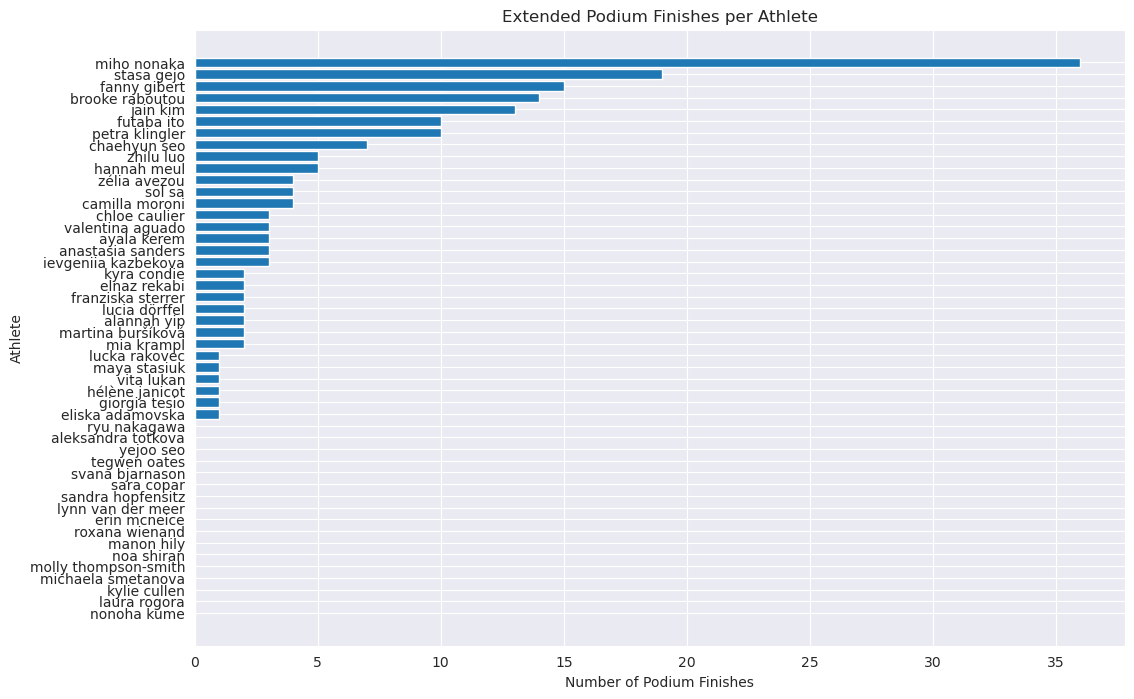

In [294]:
import matplotlib.pyplot as plt

# Sort the dataset by the number of podiums in descending order (from more to less)
sorted_data = athlete_stats_with_placements.sort_values(by='extended podiums', ascending=True)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(sorted_data['name'], sorted_data['extended podiums'])
plt.ylabel('Athlete')
plt.xlabel('Number of Podium Finishes')
plt.title('Extended Podium Finishes per Athlete')
plt.show()

Key findings:
Overall Performance: Miho Nonaka, with 36 extended podium finishes, clearly stands out as the top performer. This high number indicates consistent high-level performance across competitions.

Elite Group: Climbers like Stasa Gejo, Fanny Gibert, Brooke Raboutou, and Jain Kim, who have more than 10 extended podium finishes, represent an elite group. They are likely among the most competitive and successful in this group of athletes.

Emerging Talents and Veterans: The presence of climbers with fewer extended podium finishes (like those with 1 to 4 finishes) could indicate either emerging talents who are starting to make their mark or veterans who have been consistent but perhaps not at the very top of the rankings.

Comparison with Regular Podiums: If you have data on regular podiums (top 3 finishes), comparing it with extended podiums can highlight athletes who are consistently in the top 5 but may not always make it into the top 3.

Consistency vs. Peak Performance: Athletes with a high number of extended podiums but fewer actual podiums (1st to 3rd) might be very consistent performers who often reach the final rounds but don't always place in the very top positions.

Potential for Growth: Athletes with lower extended podium numbers could be ones to watch for future growth, especially if they are newer to the competition circuit.

Competitive Landscape: The distribution of extended podiums can also give a sense of the competitive landscape. A few athletes dominating the top spots could indicate a less competitive field, while more even distribution suggests a highly competitive environment where many athletes have chances to excel.

This variable is a valuable metric for assessing not just the peak achievements (like wins) of athletes, but also their overall consistency and ability to perform at a high level across competitions.

Now let's see the Podium Finishes only (1st to 3rd spot).

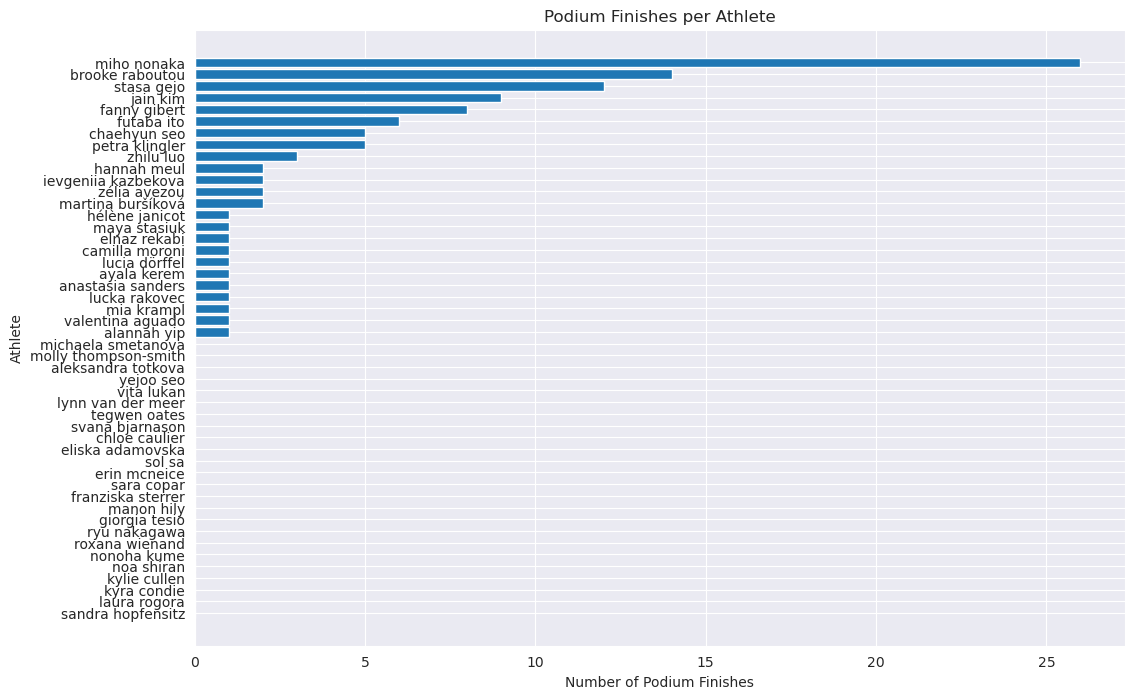

In [295]:
import matplotlib.pyplot as plt

# Sort the dataset by the number of podiums in descending order (from more to less)
sorted_data = athlete_stats_with_placements.sort_values(by='podiums', ascending=True)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(sorted_data['name'], sorted_data['podiums'])
plt.ylabel('Athlete')
plt.xlabel('Number of Podium Finishes')
plt.title('Podium Finishes per Athlete')
plt.show()

Based on the podium results per athlete, here are some observations:

Variability in podium finishes: There is a wide range of podium finishes among the athletes, with some athletes from the 48 qualified having multiple podium finishes and others having none. 

Top Performers: Athletes like Miho Nonaka, Fanny Gibert, and Petra Klingler have consistently performed well, achieving a significant number of podium finishes. They have secured 1st, 2nd, and 3rd place positions multiple times.
We should note Miho Nonaka stands out as one of the top-performing athletes in the dataset. She has achieved a substantial number of podium finishes, with 26 podiums in total. This indicates her consistent success in climbing competitions. Her podium percentage (75.44%) is considerably higher than most other athletes in the dataset.

Consistency: Some athletes have a consistent presence on the podium, with a balance of 1st, 2nd, and 3rd place finishes. For example, Brooke Raboutou has achieved a high number of podium finishes, including both 1st and 2nd places.

Varied Performance: On the other hand, there are athletes who have secured podium finishes but with a more varied distribution of 1st, 2nd, 3rd, 4th, and 5th place positions.

Emerging Talent: Some athletes, such as Ayala Kerem and Camilla Moroni, have started their careers recently and have already achieved podium finishes, showing potential for future success.

Diversity in Nationalities: The athletes represent various countries, highlighting the global nature of the sport.

In summary, the podium results per athlete provide insights into the performance and consistency of climbers in competitive climbing events. It showcases both experienced athletes with numerous podium finishes and emerging talents with the potential for future success. The results also reflect the competitive nature of the sport, where podium positions are highly coveted and may vary from one competition to another.

Now let's check for patterns with a correlation matrix mixing the climber's statistics with placements: 

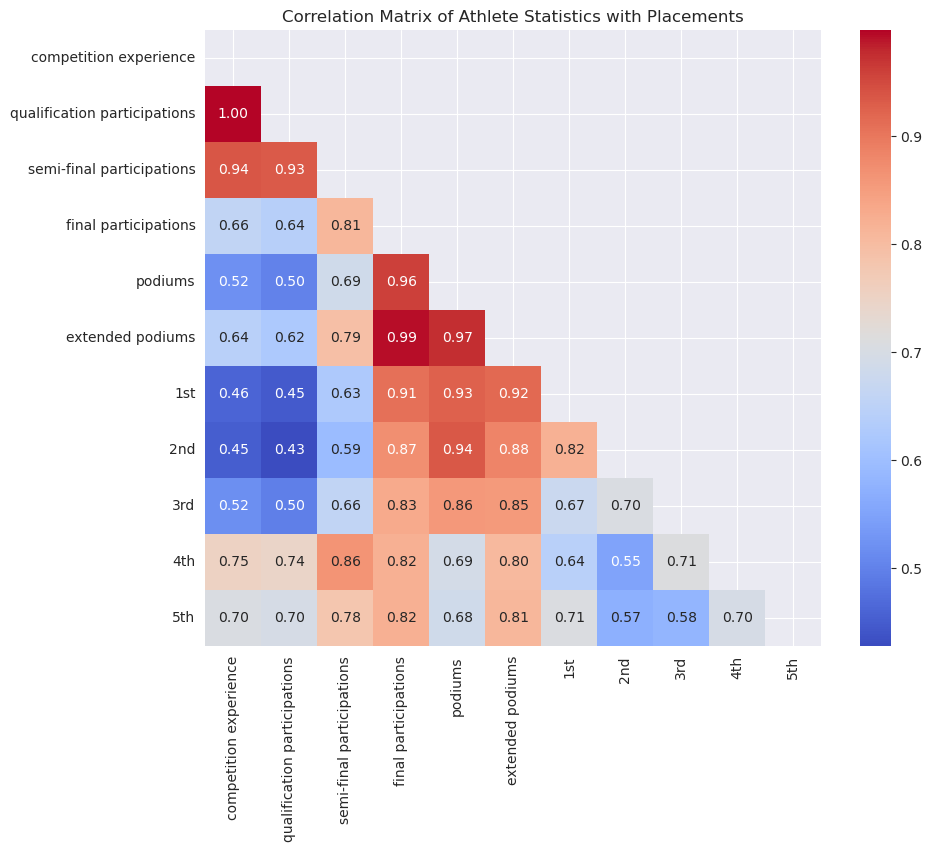

In [296]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the correlation matrix, considering only numeric columns
corr = athlete_stats_with_placements.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Add title
plt.title('Correlation Matrix of Athlete Statistics with Placements')

# Show the plot
plt.show()

In [297]:
# same as before but without visualization 
# Calculate the correlation matrix, considering only numeric columns
corr = athlete_stats_with_placements.corr(numeric_only=True)

# Display the correlation matrix as a DataFrame
print(corr)

                              competition experience  \
competition experience                      1.000000   
qualification participations                0.998089   
semi-final participations                   0.937330   
final participations                        0.657441   
podiums                                     0.521215   
extended podiums                            0.641878   
1st                                         0.460961   
2nd                                         0.450752   
3rd                                         0.518543   
4th                                         0.751393   
5th                                         0.704647   

                              qualification participations  \
competition experience                            0.998089   
qualification participations                      1.000000   
semi-final participations                         0.931456   
final participations                              0.640036   
podiums          

The provided correlation matrix offers insights into the relationships between different variables related to the athletes' participation and success in competitions. Let's interpret some notable correlations:

1. **Qualification Participations and Semi-Final Participations (0.93)**:
   - A very high positive correlation. This suggests that from these 48 athletes who competed in the qualification rounds tend to pass to the semi-final rounds.

2. **Final Participations and Podiums (0.96)**:
   - An extremely high positive correlation. Athletes who frequently participate in final rounds are more likely to have a higher number of podium finishes. 

3. **4th, 5th Places and Podiums**:
   - 4th (0.69) and 5th (0.68) places also show strong positive correlations with podiums, though slightly lower than the top three positions. This suggests that athletes who frequently rank in 4th and 5th places also accumulate a noticeable number of podium finishes.

4. **Correlations among 1st, 2nd, 3rd**:
   - There are positive correlations among these variables, with higher correlations between 1st, 2nd, and 3rd places. This could indicate that athletes who win competitions (1st place) are also more likely to finish in 2nd or 3rd places in other competitions.

5. **Final Participations and 1st, 2nd, 3rd Places**:
   - High positive correlations with 1st (0.91), 2nd (0.87), and 3rd (0.83) places. Athletes participating in more final rounds are more likely to achieve top-three finishes.

6. **Semi-Final Participations and 4th, 5th Places**:
   - Strong positive correlations with 4th (0.86) and 5th (0.78) places suggest that athletes frequently participating in semi-finals often finish in these positions when they get to finals.

These correlations provide valuable insights into how participation in different stages of competitions relates to achieving various ranks, especially podium finishes. It's important to note that correlation does not imply causation, and these relationships might be influenced by various factors, including the athletes' skill levels, competition formats, and other external factors.

In [298]:
from itables import init_notebook_mode
init_notebook_mode(all_interactive=False)

# Create a copy of the DataFrame to avoid modifying the original
df_qualified_copy = df_qualified.copy()

def calculate_successful_tops_and_attempts(row):
    successful_tops = 0
    total_attempts = 0

    for i in range(1, 7):  # Assuming up to 6 boulders
        top_column = f'top{i}'
        zone_column = f'zone{i}'

        # Check and count top attempts
        if pd.notnull(row[top_column]) and row[top_column] != float('inf'):
            successful_tops += 1
            total_attempts += row[top_column]  # Number of attempts from top column
        elif row[top_column] == float('inf'):
            # If top is 'inf', count the zone attempts or count as 1 if zone is also 'inf'
            total_attempts += row[zone_column] if pd.notnull(row[zone_column]) and row[zone_column] != float('inf') else 1

    return successful_tops, total_attempts

# Apply the function to each row and assign using .loc
calculated_values = df_qualified_copy.apply(calculate_successful_tops_and_attempts, axis=1, result_type='expand')
df_qualified_copy.loc[:, 'successful tops'] = calculated_values[0]
df_qualified_copy.loc[:, 'total attempts'] = calculated_values[1]

# Calculate Top Percentage, handling division by zero
df_qualified_copy['top percentage'] = (df_qualified_copy['successful tops'] / df_qualified_copy['total attempts']).fillna(0) * 100
df_qualified_copy['top percentage'] = df_qualified_copy['top percentage'].round(2)

# Create the career_tops_stats DataFrame by aggregating values for each climber's career
career_tops_stats = df_qualified_copy.groupby('name')[['successful tops', 'total attempts']].sum()
career_tops_stats['top percentage'] = (career_tops_stats['successful tops'] / career_tops_stats['total attempts']).fillna(0) * 100
career_tops_stats['top percentage'] = career_tops_stats['top percentage'].round(2)

# Calculate Average Attempts per Top
career_tops_stats['average attempts per top'] = (career_tops_stats['total attempts'] / career_tops_stats['successful tops']).fillna(0)
career_tops_stats['average attempts per top'] = career_tops_stats['average attempts per top'].round(2)

# Remove trailing .0 from all columns except 'top percentage'
career_tops_stats = career_tops_stats.applymap(lambda x: int(x) if x.is_integer() else round(x, 2) if not isinstance(x, str) else x)

# Display the career_tops_stats DataFrame using itables for interactive visualization
career_tops_stats

<IPython.core.display.Javascript object>

successful tops  total attempts  top percentage  \
name                                                                    
alannah yip                       114             547           20.84   
aleksandra totkova                 14             158            8.86   
anastasia sanders                  39             229           17.03   
ayala kerem                        95             438           21.69   
brooke raboutou                   168             589           28.52   
camilla moroni                    111             588           18.88   
chaehyun seo                       98             387           25.32   
chloe caulier                     208             884           23.53   
eliska adamovska                   20             190           10.53   
elnaz rekabi                       68             325           20.92   
erin mcneice                       22             139           15.83   
fanny gibert                      319            1093           29.19   
franziska sterrer                 111             625           17.76   
futaba ito                        192             690           27.83   
giorgia tesio                      68             359           18.94   
hannah meul                       107             440           24.32   
hélène janicot                     24              97           24.74   
ievgeniia kazbekova               127             523           24.28   
jain kim                          197             735           26.80   
kylie cullen                       52             292           17.81   
kyra condie                        96             527           18.22   
laura rogora                       67             380           17.63   
lucia dörffel                      57             298           19.13   
lucka rakovec                      47             244           19.26   
lynn van der meer                   7              60           11.67   
manon hily                         34             207           16.43   
martina buršíková                  25              98           25.51   
maya stasiuk                       10              64           15.62   
mia krampl                         54             325           16.62   
michaela smetanova                  4              81            4.94   
miho nonaka                       462            1255           36.81   
molly thompson-smith               14             161            8.70   
noa shiran                         21             116           18.10   
nonoha kume                        15              56           26.79   
petra klingler                    339            1233           27.49   
roxana wienand                     41             276           14.86   
ryu nakagawa                       31             178           17.42   
sandra hopfensitz                  18             121           14.88   
sara copar                         13              91           14.29   
sol sa                            223            1003           22.23   
stasa gejo                        249             844           29.50   
svana bjarnason                     1              29            3.45   
tegwen oates                        2              24            8.33   
valentina aguado                   55             287           19.16   
vita lukan                         59             336           17.56   
yejoo seo                           9              90           10.00   
zhilu luo                          70             268           26.12   
zélia avezou                       53             207           25.60   

                      average attempts per top  
name                                            
alannah yip                               4.80  
aleksandra totkova                       11.29  
anastasia sanders                         5.87  
ayala kerem                               4.61  
brooke raboutou                           3.51  
camilla moroni              

In [299]:
# Reset the index and set 'name' as the index column
career_tops_stats.reset_index(inplace=True)

# Save the DataFrame with 'name' as the first column
career_tops_stats = career_tops_stats[['name', 'successful tops', 'total attempts', 'top percentage', 'average attempts per top']]

In [300]:
# Saving the DataFrame as a CSV file
career_tops_stats.to_csv('career_tops_stats.csv', index=False)

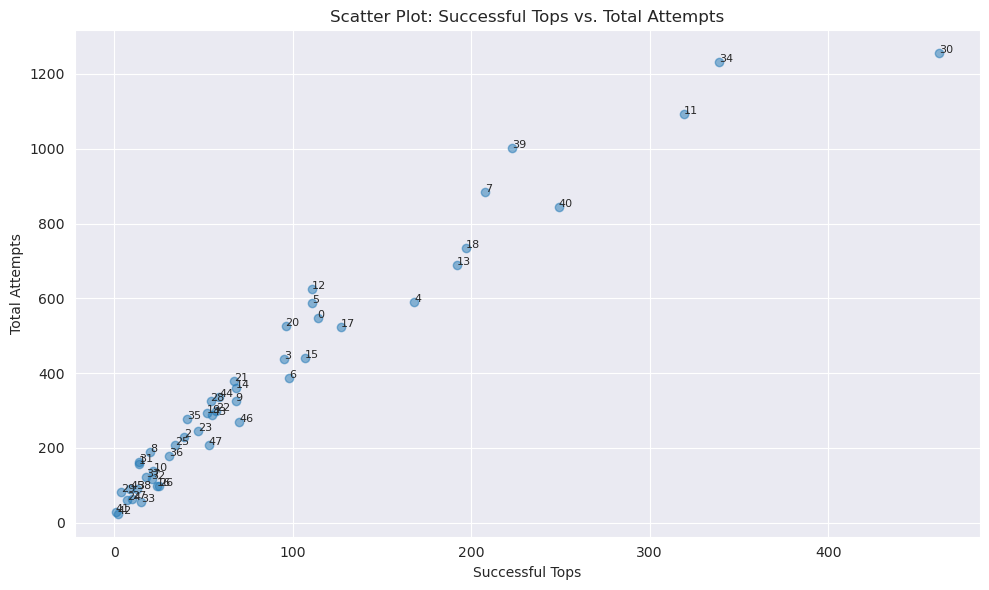

In [301]:
import matplotlib.pyplot as plt

# Data
x = career_tops_stats['successful tops']
y = career_tops_stats['total attempts']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter Plot: Successful Tops vs. Total Attempts')
plt.xlabel('Successful Tops')
plt.ylabel('Total Attempts')

# Add labels for individual data points (climbers' names)
for i, name in enumerate(career_tops_stats.index):
    plt.annotate(name, (x[i], y[i]), fontsize=8)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [302]:
import plotly.express as px

# Data
x = career_tops_stats['successful tops']
y = career_tops_stats['total attempts']
names = career_tops_stats.index

# Create a scatter plot with Plotly
fig = px.scatter(x=x, y=y, text=names, labels={'x': 'Successful Tops', 'y': 'Total Attempts'},
                 title='Scatter Plot: Successful Tops vs. Total Attempts', opacity=0.7)

# Customize layout
fig.update_layout(
    xaxis=dict(
        showgrid=True,  # Set to True to show grid lines for the x-axis
        type='linear'   # Specify the type of x-axis (linear in this case)
    ),
    yaxis=dict(
        showgrid=True,  # Set to True to show grid lines for the y-axis
        type='linear'   # Specify the type of y-axis (linear in this case)
    )
)

# Show the plot
fig.show()

Merge the df:

In [303]:
# Merge the DataFrames on the 'name' column
df_climbers_full_stats = athlete_stats_with_placements.merge(career_tops_stats, on='name', how='left')

# Fill NaN values with 0 (or an appropriate value)
df_climbers_full_stats.fillna(0, inplace=True)

# Reorder columns if needed
# Specify the desired column order in a list
desired_column_order = ['name', 'country', 'active years', 'career length', 'qualification participations',
                        'semi-final participations', 'final participations', 'semi-final percentage',
                        'final percentage', 'podiums', 'extended podiums', '1st', '2nd', '3rd', '4th', '5th',
                        'successful tops', 'total attempts', 'top percentage', 'average attempts per top']

# Apply the new order to the DataFrame
df_climbers_full_stats = df_climbers_full_stats[desired_column_order]

# Display the combined DataFrame
df_climbers_full_stats

name country active years career length  \
0            alannah yip     CAN    2011-2023     12+ years   
1     aleksandra totkova     BUL    2022-2023     1-2 years   
2      anastasia sanders     USA    2023-2023     1-2 years   
3            ayala kerem     ISR    2020-2023     3-5 years   
4        brooke raboutou     USA    2017-2023     6-8 years   
5         camilla moroni     ITA    2019-2023     3-5 years   
6           chaehyun seo     KOR    2019-2023     3-5 years   
7          chloe caulier     BEL    2012-2023    9-12 years   
8       eliska adamovska     CZE    2019-2023     3-5 years   
9           elnaz rekabi     IRI    2014-2023    9-12 years   
10          erin mcneice     GBR    2022-2023     1-2 years   
11          fanny gibert     FRA    2011-2023     12+ years   
12     franziska sterrer     AUT    2015-2023    9-12 years   
13            futaba ito     JPN    2018-2023     6-8 years   
14         giorgia tesio     ITA    2016-2023     6-8 years   
15           hannah meul     GER    2017-2023     6-8 years   
16        hélène janicot     FRA    2013-2023    9-12 years   
17   ievgeniia kazbekova     UKR    2012-2023    9-12 years   
18              jain kim     KOR    2008-2023     12+ years   
19          kylie cullen     USA    2021-2023     3-5 years   
20           kyra condie     USA    2013-2023    9-12 years   
21          laura rogora     ITA    2019-2023     3-5 years   
22         lucia dörffel     GER    2016-2023     6-8 years   
23         lucka rakovec     SLO    2019-2023     3-5 years   
24     lynn van der meer     NED    2021-2023     3-5 years   
25            manon hily     FRA    2014-2023    9-12 years   
26     martina buršíková     SVK    2023-2023     1-2 years   
27          maya stasiuk     AUS    2023-2023     1-2 years   
28            mia krampl     SLO    2018-2023     6-8 years   
29    michaela smetanova     CZE    2019-2023     3-5 years   
30           miho nonaka     JPN    2014-2023    9-12 years   
31  molly thompson-smith     GBR    2017-2023     6-8 years   
32            noa shiran     ISR    2020-2023     3-5 years   
33           nonoha kume     JPN    2023-2023     1-2 years   
34        petra klingler     SUI    2009-2023     12+ years   
35        roxana wienand     GER    2017-2023     6-8 years   
36          ryu nakagawa     JPN    2021-2023     3-5 years   
37     sandra hopfensitz     GER    2022-2023     1-2 years   
38            sara copar     SLO    2022-2023     1-2 years   
39                sol sa     KOR    2011-2023     12+ years   
40            stasa gejo     SRB    2013-2023    9-12 years   
41       svana bjarnason     ISL    2023-2023     1-2 years   
42          tegwen oates     RSA    2023-2023     1-2 years   
43      valentina aguado     ARG    2017-2023     6-8 years   
44            vita lukan     SLO    2017-2023     6-8 years   
45             yejoo seo     KOR    2022-2023     1-2 years   
46             zhilu luo     CHN    2022-2023     1-2 years   
47          zélia avezou     FRA    2022-2023     1-2 years   

    qualification participations  semi-final participations  \
0                             40                         20   
1                             13                          0   
2                              7                          6   
3                             19                         15   
4                             27                         19   
5                             21                         17   
6                             18                         15   
7                             59                         28   
8                             12                          2   
9                             20                          9   
10                             9                          2   
11                            60                         44   
12                            36                         18   
13                            32                  

In [304]:
# Saving it as a CSV file
df_climbers_full_stats.to_csv('df_climbers_full_stats.csv', index=False)

### extra: perfect scores

In [305]:
# top stats in general 
import pandas as pd

# Create a copy of df_qualified to avoid SettingWithCopyWarning
df_qualified_copy = df_qualified.copy()

# Check if a value is a successful top
def is_successful_top(value):
    try:
        # Check if the value is numeric and not 'inf'
        return float(value) != float('inf')
    except ValueError:
        # Non-numeric values (including 'inf') are not successful
        return False

# Function to count the number of successful tops per round
def count_successful_tops(row):
    return sum(is_successful_top(row[f'top{i}']) for i in range(1, 5))

# Apply the function to each row of the copy and count occurrences of each top count
df_qualified_copy['successful_tops'] = df_qualified_copy.apply(count_successful_tops, axis=1)

# Initialize a DataFrame to store the counts for each top number
tops_stats = pd.DataFrame(index=df_qualified_copy['name'].unique())

# Count how often each athlete achieved exactly 1, 2, 3, or 4 tops
for top_count in range(1, 5):
    tops_stats[f'{top_count} tops'] = df_qualified_copy.groupby('name')['successful_tops'].apply(lambda x: (x == top_count).sum())

# Calculate the "Perfect Score Percentage" (4 Tops) without adding the % sign
tops_stats['perfect score percentage'] = (tops_stats['4 tops'] / (tops_stats['1 tops'] + tops_stats['2 tops'] + tops_stats['3 tops'] + tops_stats['4 tops'])) * 100
tops_stats['perfect score percentage'] = tops_stats['perfect score percentage'].round(2)

# Calculate the "Almost Perfect Score Percentage" (3 Tops) without adding the % sign
tops_stats['almost perfect score percentage'] = (tops_stats['3 tops'] / (tops_stats['1 tops'] + tops_stats['2 tops'] + tops_stats['3 tops'] + tops_stats['4 tops'])) * 100
tops_stats['almost perfect score percentage'] = tops_stats['almost perfect score percentage'].round(2)

# Display the DataFrame
tops_stats

1 tops  2 tops  3 tops  4 tops  \
jain kim                  14      23      23      11   
petra klingler            35      41      34      21   
sol sa                    24      28      18      15   
alannah yip               18      17      10       4   
fanny gibert              22      38      31      23   
chloe caulier             29      23      21      10   
ievgeniia kazbekova       18      18      11       5   
hélène janicot             3       2       2       2   
stasa gejo                19      25      26      19   
kyra condie                9      17       7       5   
elnaz rekabi               6       8       8       4   
miho nonaka               18      38      50      43   
manon hily                 5       5       3       1   
franziska sterrer         18      16       7       6   
giorgia tesio             12       6       8       2   
lucia dörffel              7      10       5       2   
vita lukan                 5       6       6       4   
hannah meul               16      17       5       8   
brooke raboutou           10      19      20      11   
valentina aguado           6       9       4       4   
roxana wienand             6       7       5       1   
molly thompson-smith       9       0       1       0   
mia krampl                 8       6       5       3   
futaba ito                12      17      26      12   
lucka rakovec              7       5       6       1   
camilla moroni            13       6       9      12   
laura rogora               9      15       4       1   
eliska adamovska           7       4       1       0   
michaela smetanova         4       0       0       0   
chaehyun seo              10       8      14       5   
ayala kerem                7      10       9       7   
noa shiran                 5       4       2       0   
kylie cullen              11       7       4       1   
lynn van der meer          1       2       0       0   
ryu nakagawa               6       2       5       0   
sara copar                 1       2       2       0   
aleksandra totkova         8       1       1       0   
zélia avezou               3       8       5       3   
sandra hopfensitz          2       1       3       0   
yejoo seo                  3       2       0       0   
zhilu luo                  5      10      11       1   
erin mcneice               1       6       1       1   
martina buršíková          2       5       2       1   
nonoha kume                3       2       2       0   
anastasia sanders          5       5       6       0   
maya stasiuk               4       1       1       0   
svana bjarnason            1       0       0       0   
tegwen oates               0       1       0       0   

                      perfect score percentage  \
jain kim                                 15.49   
petra klingler                           16.03   
sol sa                                   17.65   
alannah yip                               8.16   
fanny gibert                             20.18   
chloe caulier                            12.05   
ievgeniia kazbekova                       9.62   
hélène janicot                           22.22   
stasa gejo                               21.35   
kyra condie                              13.16   
elnaz rekabi                             15.38   
miho nonaka                              28.86   
manon hily                                7.14   
franziska sterrer                        12.77   
giorgia tesio                             7.14   
lucia dörffel                             8.33   
vita lukan                               19.05   
hannah meul                              17.39   
brooke raboutou                          18.33   
valentina aguado                         17.39   
roxana wienand                            5.26   
molly thompson-smith                      0.00   
mia krampl                               13.64   
futaba ito                               17.91   
lucka rakovec              

OKAY NOW LET'S LOOK AT RECENT PERFORMANCE: 

# 2023 calculations:

In [306]:
import pandas as pd

# path to the file
xlsx_path = '/home/sole/Documents/DS/Projecte Final/Boulder_Women_2023.xlsx'

# Import the XLSX file into a DataFrame (df_boulder)
df_boulder_2023 = pd.read_excel(xlsx_path)

# Display the DataFrame
print(df_boulder_2023)

      year discipline                                        competition  \
0     2023    Boulder    Boulder IFSC European Cup Chambéry 2023 7-8 Apr   
1     2023    Boulder    Boulder IFSC European Cup Chambéry 2023 7-8 Apr   
2     2023    Boulder    Boulder IFSC European Cup Chambéry 2023 7-8 Apr   
3     2023    Boulder    Boulder IFSC European Cup Chambéry 2023 7-8 Apr   
4     2023    Boulder    Boulder IFSC European Cup Chambéry 2023 7-8 Apr   
...    ...        ...                                                ...   
1466  2023    Boulder  Boulder IFSC World Championships Bern 2023 1-1...   
1467  2023    Boulder  Boulder IFSC World Championships Bern 2023 1-1...   
1468  2023    Boulder  Boulder IFSC World Championships Bern 2023 1-1...   
1469  2023    Boulder  Boulder IFSC World Championships Bern 2023 1-1...   
1470  2023    Boulder  Boulder IFSC World Championships Bern 2023 1-1...   

     gender level   group                  name country top1 zone1 top2 zone2  \
0     

In [307]:
import pandas as pd

# Load your data
xlsx_path = '/home/sole/Documents/DS/Projecte Final/Boulder_Women_2023.xlsx'
df_boulder_2023 = pd.read_excel(file_path)

# Convert specified columns to float64
columns_to_convert = ['top1', 'zone1', 'top2', 'zone2', 'top3', 'zone3', 'top4', 'zone4']
df_boulder_2023[columns_to_convert] = df_boulder_2023[columns_to_convert].astype('float64')

# Verify the changes
print(df_boulder_2023.dtypes)

year             int64
discipline      object
competition     object
gender          object
level           object
group           object
name            object
country         object
top1           float64
zone1          float64
top2           float64
zone2          float64
top3           float64
zone3          float64
top4           float64
zone4          float64
top5           float64
zone5          float64
top6           float64
zone6          float64
dtype: object


In [308]:

# List of athletes to filter
athletes = [
    "brooke raboutou", "miho nonaka", "chaehyun seo", "jain kim", "vita lukan",
    "mia krampl", "anastasia sanders", "futaba ito", "nonoha kume", "hélène janicot",
    "manon hily", "ayala kerem", "hannah meul", "stasa gejo", "molly thompson-smith",
    "fanny gibert", "laura rogora", "zhilu luo", "ryu nakagawa", "zélia avezou",
    "ievgeniia kazbekova", "eliska adamovska", "sara copar", "camilla moroni",
    "lucka rakovec", "kyra condie", "lynn van der meer", "lucia dörffel", "giorgia tesio",
    "petra klingler", "noa shiran", "roxana wienand", "elnaz rekabi", "franziska sterrer",
    "yejoo seo", "erin mcneice", "aleksandra totkova", "sandra hopfensitz", "alannah yip",
    "michaela smetanova", "maya stasiuk", "kylie cullen", "martina buršíková",
    "valentina aguado", "sol sa", "chloe caulier", "tegwen oates", "svana bjarnason"
]

# Filter the DataFrame for these athletes
df_qualified_2023 = df_boulder_2023[df_boulder_2023['name'].str.lower().isin(athletes)]

# Filtering the DataFrame to include only rows for the year 2023
df_qualified_2023 = df_boulder_2023[df_boulder_2023['year'] == 2023]

# Rename all columns to include '2023' in their titles
df_qualified_2023 = df_qualified_2023.rename(columns=lambda x: f"{x} in 2023")

# Optional: Save the filtered data to a new Excel file
df_qualified_2023.to_excel('df_qualified_2023.xlsx', index=False)

# Display all the data for the filtered athletes
print(df_qualified_2023)

      year in 2023 discipline in 2023  \
1361          2023            Boulder   
1362          2023            Boulder   
1363          2023            Boulder   
1364          2023            Boulder   
1365          2023            Boulder   
...            ...                ...   
1864          2023            Boulder   
1865          2023            Boulder   
1866          2023            Boulder   
1867          2023            Boulder   
1868          2023            Boulder   

                                    competition in 2023 gender in 2023  \
1361    Boulder IFSC European Cup Chambéry 2023 7-8 Apr              W   
1362    Boulder IFSC European Cup Chambéry 2023 7-8 Apr              W   
1363    Boulder IFSC European Cup Chambéry 2023 7-8 Apr              W   
1364    Boulder IFSC European Cup Chambéry 2023 7-8 Apr              W   
1365    Boulder IFSC European Cup Chambéry 2023 7-8 Apr              W   
...                                                 ...        

In [309]:
print(df_qualified_2023.columns)

Index(['year in 2023', 'discipline in 2023', 'competition in 2023',
       'gender in 2023', 'level in 2023', 'group in 2023', 'name in 2023',
       'country in 2023', 'top1 in 2023', 'zone1 in 2023', 'top2 in 2023',
       'zone2 in 2023', 'top3 in 2023', 'zone3 in 2023', 'top4 in 2023',
       'zone4 in 2023', 'top5 in 2023', 'zone5 in 2023', 'top6 in 2023',
       'zone6 in 2023'],
      dtype='object')


In [310]:
import pandas as pd

# Function to calculate statistics for each athlete for 2023
def athlete_statistics_2023(df):
    qualification_count = (df['level in 2023'] == 'Q').sum()
    semi_final_count = (df['level in 2023'] == 'S').sum()
    final_count = (df['level in 2023'] == 'F').sum()

    # Calculate percentages
    semi_final_percentage = (semi_final_count / qualification_count * 100) if qualification_count > 0 else 0
    final_percentage = (final_count / qualification_count * 100) if qualification_count > 0 else 0

    return pd.Series({
        'country in 2023': df['country in 2023'].iloc[0],
        'qualification participations in 2023': qualification_count,
        'semi final participations in 2023': semi_final_count,
        'final participations in 2023': final_count,
        'semi final percentage in 2023': f"{semi_final_percentage:.2f}%",
        'final percentage in 2023': f"{final_percentage:.2f}%"
    })


# Apply the function to calculate statistics for each athlete
athlete_stats_2023 = df_qualified_2023.groupby('name in 2023').apply(athlete_statistics_2023)  #

# Reset index to make 'name' a column (no renaming needed in this case)
athlete_stats_2023.reset_index(inplace=True)

# Reorder columns if needed
columns_order_2023 = ['name in 2023', 'country in 2023', 'qualification participations in 2023',
                      'semi final participations in 2023', 'final participations in 2023',
                      'semi final percentage in 2023', 'final percentage in 2023']
athlete_stats_2023 = athlete_stats_2023[columns_order_2023]

# Display the DataFrame
athlete_stats_2023

name in 2023 country in 2023  \
0            alannah yip             CAN   
1     aleksandra totkova             BUL   
2      anastasia sanders             USA   
3            ayala kerem             ISR   
4        brooke raboutou             USA   
5         camilla moroni             ITA   
6           chaehyun seo             KOR   
7          chloe caulier             BEL   
8       eliska adamovska             CZE   
9           elnaz rekabi             IRI   
10          erin mcneice             GBR   
11          fanny gibert             FRA   
12     franziska sterrer             AUT   
13            futaba ito             JPN   
14         giorgia tesio             ITA   
15           hannah meul             GER   
16        hélène janicot             FRA   
17   ievgeniia kazbekova             UKR   
18              jain kim             KOR   
19          kylie cullen             USA   
20           kyra condie             USA   
21          laura rogora             ITA   
22         lucia dörffel             GER   
23         lucka rakovec             SLO   
24     lynn van der meer             NED   
25            manon hily             FRA   
26     martina buršíková             SVK   
27          maya stasiuk             AUS   
28            mia krampl             SLO   
29    michaela smetanova             CZE   
30           miho nonaka             JPN   
31  molly thompson-smith             GBR   
32            noa shiran             ISR   
33           nonoha kume             JPN   
34        petra klingler             SUI   
35        roxana wienand             GER   
36          ryu nakagawa             JPN   
37     sandra hopfensitz             GER   
38            sara copar             SLO   
39                sol sa             KOR   
40            stasa gejo             SRB   
41       svana bjarnason             ISL   
42          tegwen oates             RSA   
43      valentina aguado             ARG   
44            vita lukan             SLO   
45             yejoo seo             KOR   
46             zhilu luo             CHN   
47          zélia avezou             FRA   

    qualification participations in 2023  semi final participations in 2023  \
0                                      7                                  1   
1                                      9                                  0   
2                                      7                                  6   
3                                      7                                  7   
4                                      6                                  7   
5                                      8                                  6   
6                                      9                                  7   
7                                      9                                  2   
8                                      5                                  0   
9                                      4                                  2   
10                                     8                                  2   
11                                     6                                  2   
12                                     8                                  1   
13                                     8                                  6   
14                                     7                                  3   
15                                     7                                  4   
16                                     4                                  3   
17                                     8                                  5   
18                                     7                                  2   
19                                     7                                  0   
20                                     7                                  4   
21                                     8                                  3   
22                                    

In [311]:
# Print the column names of df_qualified_2023
print(df_qualified_2023.columns)

Index(['year in 2023', 'discipline in 2023', 'competition in 2023',
       'gender in 2023', 'level in 2023', 'group in 2023', 'name in 2023',
       'country in 2023', 'top1 in 2023', 'zone1 in 2023', 'top2 in 2023',
       'zone2 in 2023', 'top3 in 2023', 'zone3 in 2023', 'top4 in 2023',
       'zone4 in 2023', 'top5 in 2023', 'zone5 in 2023', 'top6 in 2023',
       'zone6 in 2023'],
      dtype='object')


In [312]:
import pandas as pd

# Load the data
xlsx_path = '/home/sole/Documents/DS/Projecte Final/Boulder_Women_2023.xlsx'
df_boulder_2023 = pd.read_excel(xlsx_path)

# Perfect score for comparison
perfect_score = 8  # 4 tops and 4 zones

# Calculate score and select top 5 athletes for each competition in finals
top_athletes_2023 = (
    df_boulder_2023[df_boulder_2023['level'] == 'F']
    .assign(
        score=lambda x: perfect_score - x[['top1', 'zone1', 'top2', 'zone2', 'top3', 'zone3', 'top4', 'zone4']].sum(axis=1, numeric_only=True)
    )
    .sort_values(by=['competition', 'score'])
    .groupby('competition').head(5)
    .assign(
        position=lambda x: x.groupby('competition').cumcount() + 1
    )
)

# Map index numbers to positions
position_map = {1: '1st', 2: '2nd', 3: '3rd', 4: '4th', 5: '5th'}
top_athletes_2023['position'] = top_athletes_2023['position'].map(position_map)

# Rename columns to include 'in 2023'
columns_to_rename = {
    'top1': 'top1 in 2023', 'zone1': 'zone1 in 2023',
    'top2': 'top2 in 2023', 'zone2': 'zone2 in 2023',
    'top3': 'top3 in 2023', 'zone3': 'zone3 in 2023',
    'top4': 'top4 in 2023', 'zone4': 'zone4 in 2023',
    'position': 'position in 2023'
}
top_athletes_2023.rename(columns=columns_to_rename, inplace=True)

# Selecting required columns
columns_to_select_2023 = ['competition', 'name', 'country', 'position in 2023',
                          'top1 in 2023', 'zone1 in 2023', 'top2 in 2023', 'zone2 in 2023',
                          'top3 in 2023', 'zone3 in 2023', 'top4 in 2023', 'zone4 in 2023']
top_athletes_2023 = top_athletes_2023[columns_to_select_2023]

# Displaying the result
top_athletes_2023

competition               name  \
1018  Boulder & Lead IFSC World Championships Bern 2...     janja garnbret   
1019  Boulder & Lead IFSC World Championships Bern 2...    brooke raboutou   
1020  Boulder & Lead IFSC World Championships Bern 2...       jessica pilz   
1021  Boulder & Lead IFSC World Championships Bern 2...     oriane bertone   
1022  Boulder & Lead IFSC World Championships Bern 2...        miho nonaka   
...                                                 ...                ...   
879   Boulder Pan American Games Santiago 2023 20-25...   natalia grossman   
880   Boulder Pan American Games Santiago 2023 20-25...    brooke raboutou   
881   Boulder Pan American Games Santiago 2023 20-25...        alannah yip   
882   Boulder Pan American Games Santiago 2023 20-25...  anastasia sanders   
883   Boulder Pan American Games Santiago 2023 20-25...   valentina aguado   

     country position in 2023 top1 in 2023 zone1 in 2023 top2 in 2023  \
1018     SLO              1st            1             1            2   
1019     USA              2nd            1             1            2   
1020     AUT              3rd            2             1            4   
1021     FRA              4th          inf             2            3   
1022     JPN              5th          inf             3          inf   
...      ...              ...          ...           ...          ...   
879      USA              1st            2             2            1   
880      USA              2nd          inf             4            1   
881      CAN              3rd            2             2            2   
882      USA              4th          inf             6            3   
883      ARG              5th          inf             2            1   

     zone2 in 2023 top3 in 2023 zone3 in 2023 top4 in 2023 zone4 in 2023  
1018             1            1             1          inf             1  
1019             2          inf             1          inf             2  
1020             4          inf             1          inf             7  
1021             2          inf             1          inf             1  
1022             1          inf             4            2             1  
...            ...          ...           ...          ...           ...  
879              1            1             1          inf             7  
880              1            1             1          inf             4  
881              2          inf             1          inf             2  
882              3          inf             4          inf           inf  
883              1          inf             2          inf           inf  

[100 rows x 12 columns]

In [313]:
 # List of 48 qualified climbers
selected_climbers_2023 = [
    "brooke raboutou", "miho nonaka", "chaehyun seo", "jain kim", "vita lukan",
    "mia krampl", "anastasia sanders", "futaba ito", "nonoha kume", "hélène janicot",
    "manon hily", "ayala kerem", "hannah meul", "stasa gejo", "molly thompson-smith",
    "fanny gibert", "laura rogora", "zhilu luo", "ryu nakagawa", "zélia avezou",
    "ievgeniia kazbekova", "eliska adamovska", "sara copar", "camilla moroni",
    "lucka rakovec", "kyra condie", "lynn van der meer", "lucia dörffel", "giorgia tesio",
    "petra klingler", "noa shiran", "roxana wienand", "elnaz rekabi", "franziska sterrer",
    "yejoo seo", "erin mcneice", "aleksandra totkova", "sandra hopfensitz", "alannah yip",
    "michaela smetanova", "maya stasiuk", "kylie cullen", "martina buršíková",
    "valentina aguado", "sol sa", "chloe caulier", "tegwen oates", "svana bjarnason"
]

# Filter top_athletes to include only the selected climbers, using lowercase for matching
top_selected_climbers_2023 = top_athletes_2023[top_athletes_2023['name'].str.lower().isin([c.lower() for c in selected_climbers])]

# Displaying the result
top_selected_climbers_2023

competition                 name  \
1019  Boulder & Lead IFSC World Championships Bern 2...      brooke raboutou   
1022  Boulder & Lead IFSC World Championships Bern 2...          miho nonaka   
869         Boulder FSC Asian Cup Riyadh 2023 12-16 Dec         elnaz rekabi   
895   Boulder IFSC Asian Qualifier Jakarta 2023 9-12...            zhilu luo   
896   Boulder IFSC Asian Qualifier Jakarta 2023 9-12...           futaba ito   
898   Boulder IFSC Asian Qualifier Jakarta 2023 9-12...         chaehyun seo   
899   Boulder IFSC Asian Qualifier Jakarta 2023 9-12...             jain kim   
1       Boulder IFSC European Cup Chambéry 2023 7-8 Apr    martina buršíková   
4       Boulder IFSC European Cup Chambéry 2023 7-8 Apr         zélia avezou   
441   Boulder IFSC European Cup Loverval 2023, 27-28...        chloe caulier   
443   Boulder IFSC European Cup Loverval 2023, 27-28...    martina buršíková   
887   Boulder IFSC European Qualifier Laval 2023 26-...           stasa gejo   
888   Boulder IFSC European Qualifier Laval 2023 26-...  ievgeniia kazbekova   
889   Boulder IFSC European Qualifier Laval 2023 26-...         zélia avezou   
890   Boulder IFSC European Qualifier Laval 2023 26-...        lucia dörffel   
891   Boulder IFSC European Qualifier Laval 2023 26-...          hannah meul   
903   Boulder IFSC Oceania Qualifier Melbourne 2023 ...         maya stasiuk   
862   Boulder IFSC South American Cup Curitiba 2023 ...     valentina aguado   
874   Boulder IFSC South American Cup Mar del Plata ...     valentina aguado   
1014  Boulder IFSC World Championships Bern 2023 1-1...      brooke raboutou   
1015  Boulder IFSC World Championships Bern 2023 1-1...         zélia avezou   
633         Boulder IFSC World Cup Brixen 2023 9-11 Jun         chaehyun seo   
634         Boulder IFSC World Cup Brixen 2023 9-11 Jun           stasa gejo   
635         Boulder IFSC World Cup Brixen 2023 9-11 Jun          ayala kerem   
84       Boulder IFSC World Cup Hachioji 2023 21-23 Apr      brooke raboutou   
85       Boulder IFSC World Cup Hachioji 2023 21-23 Apr          hannah meul   
87       Boulder IFSC World Cup Hachioji 2023 21-23 Apr          ayala kerem   
88       Boulder IFSC World Cup Hachioji 2023 21-23 Apr            zhilu luo   
739     Boulder IFSC World Cup Innsbruck 2023 14-18 Jun          miho nonaka   
740     Boulder IFSC World Cup Innsbruck 2023 14-18 Jun      brooke raboutou   
536          Boulder IFSC World Cup Prague 2023 2-4 Jun          miho nonaka   
537          Boulder IFSC World Cup Prague 2023 2-4 Jun           stasa gejo   
356   Boulder IFSC World Cup Salt Lake City 2023 19-...      brooke raboutou   
357   Boulder IFSC World Cup Salt Lake City 2023 19-...    anastasia sanders   
358   Boulder IFSC World Cup Salt Lake City 2023 19-...            zhilu luo   
185         Boulder IFSC World Cup Seoul 2023 28-30 Apr          miho nonaka   
187         Boulder IFSC World Cup Seoul 2023 28-30 Apr      brooke raboutou   
189         Boulder IFSC World Cup Seoul 2023 28-30 Apr    anastasia sanders   
855            Boulder NEOM IFSC Masters 2023 22-24 Nov  ievgeniia kazbekova   
858            Boulder NEOM IFSC Masters 2023 22-24 Nov       camilla moroni   
859            Boulder NEOM IFSC Masters 2023 22-24 Nov        giorgia tesio   
880   Boulder Pan American Games Santiago 2023 20-25...      brooke raboutou   
881   Boulder Pan American Games Santiago 2023 20-25...          alannah yip   
882   Boulder Pan American Games Santiago 2023 20-25...    anastasia sanders   
883   Boulder Pan American Games Santiago 2023 20-25...     valentina aguado   

     country position in 2023 top1 in 2023 zone1 in 2023 top2 in 2023  \
1019     USA              2nd            1             1            2   
1022     JPN              5th          inf             3          inf   
869      IRI              3rd            2             2          inf   
895      CHN              1st          inf             2          inf  

In [314]:
# Saving it as a CSV file
top_selected_climbers_2023.to_csv('top_selected_climbers_2023.csv', index=False)

Now that we have this new variable, let's add the columns Podium, 1st, 2nd, 3rd, 4th and 5th to see how often any of the qualified athletes got any of those spots in competitions before. We will also come up with a new variable that I decided to call 'Extended Podium', this variable will show how often an athletes ended up in the top 5 positions. Note that in finals, usually there are 8 to 6 competitors. 


In [315]:
import pandas as pd

# Define the list of selected climbers
selected_climbers_2023 = [
    "brooke raboutou", "miho nonaka", "chaehyun seo", "jain kim", "vita lukan",
    "mia krampl", "anastasia sanders", "futaba ito", "nonoha kume", "hélène janicot",
    "manon hily", "ayala kerem", "hannah meul", "stasa gejo", "molly thompson-smith",
    "fanny gibert", "laura rogora", "zhilu luo", "ryu nakagawa", "zélia avezou",
    "ievgeniia kazbekova", "eliska adamovska", "sara copar", "camilla moroni",
    "lucka rakovec", "kyra condie", "lynn van der meer", "lucia dörffel", "giorgia tesio",
    "petra klingler", "noa shiran", "roxana wienand", "elnaz rekabi", "franziska sterrer",
    "yejoo seo", "erin mcneice", "aleksandra totkova", "sandra hopfensitz", "alannah yip",
    "michaela smetanova", "maya stasiuk", "kylie cullen", "martina buršíková",
    "valentina aguado", "sol sa", "chloe caulier", "tegwen oates", "svana bjarnason"
]
# Filter top_athletes_2023 to include only the selected climbers
top_selected_climbers_2023 = top_athletes_2023[top_athletes_2023['name'].str.lower().isin([c.lower() for c in selected_climbers_2023])]

# Function to calculate statistics for each athlete for 2023
def athlete_statistics_2023(df):
    qualification_count = (df['level'] == 'Q').sum()
    semi_final_count = (df['level'] == 'S').sum()
    final_count = (df['level'] == 'F').sum()

    # Calculate percentages
    semi_final_percentage = (semi_final_count / qualification_count * 100) if qualification_count > 0 else 0
    final_percentage = (final_count / qualification_count * 100) if qualification_count > 0 else 0

    return pd.Series({
        'qualification participations in 2023': qualification_count,
        'semi final participations in 2023': semi_final_count,
        'final participations in 2023': final_count,
        'semi final percentage in 2023': f"{semi_final_percentage:.2f}%",
        'final percentage in 2023': f"{final_percentage:.2f}%"
    })

# Filter df_boulder_2023 for the selected climbers and calculate statistics
df_qualified_2023 = df_boulder_2023[df_boulder_2023['name'].str.lower().isin([c.lower() for c in selected_climbers_2023])]
athlete_stats_2023 = df_qualified_2023.groupby('name').apply(athlete_statistics_2023)

# Adding active years and country as new columns
athlete_stats_2023['active years in 2023'] = df_qualified_2023.groupby('name')['year'].apply(lambda x: f"{x.min()}-{x.max()}")
athlete_stats_2023['country in 2023'] = df_qualified_2023.groupby('name')['country'].first()

# Count placements including podiums and extended podiums (top 5 positions)
placements_2023 = top_selected_climbers_2023.groupby('name')['position in 2023'].value_counts().unstack(fill_value=0)
placements_2023 = placements_2023.rename(columns=lambda x: f"{x} in 2023")  # Rename columns to include 'in 2023'
placements_2023['podiums in 2023'] = placements_2023[['1st in 2023', '2nd in 2023', '3rd in 2023']].sum(axis=1)
placements_2023['extended podiums in 2023'] = placements_2023[['1st in 2023', '2nd in 2023', '3rd in 2023', '4th in 2023', '5th in 2023']].sum(axis=1)
placements_2023 = placements_2023.astype(int)

# Merge placements with athlete_stats
athlete_stats_with_placements_2023 = athlete_stats_2023.merge(placements_2023, left_index=True, right_index=True, how='left').fillna(0)

# Reorder columns and rename to include 'in 2023'
columns_order_2023 = ['qualification participations in 2023',
                      'semi final participations in 2023', 'final participations in 2023',
                      'semi final percentage in 2023', 'final percentage in 2023', 'podiums in 2023',
                      'extended podiums in 2023', '1st in 2023', '2nd in 2023', '3rd in 2023', '4th in 2023', '5th in 2023']
athlete_stats_with_placements_2023 = athlete_stats_with_placements_2023[columns_order_2023]

# Display the updated DataFrame
athlete_stats_with_placements_2023

qualification participations in 2023  \
name                                                         
alannah yip                                              7   
aleksandra totkova                                       9   
anastasia sanders                                        7   
ayala kerem                                              7   
brooke raboutou                                          6   
camilla moroni                                           8   
chaehyun seo                                             9   
chloe caulier                                            9   
eliska adamovska                                         5   
elnaz rekabi                                             4   
erin mcneice                                             8   
fanny gibert                                             6   
franziska sterrer                                        8   
futaba ito                                               8   
giorgia tesio                                            7   
hannah meul                                              7   
hélène janicot                                           4   
ievgeniia kazbekova                                      8   
jain kim                                                 7   
kylie cullen                                             7   
kyra condie                                              7   
laura rogora                                             8   
lucia dörffel                                            7   
lucka rakovec                                            2   
lynn van der meer                                        3   
manon hily                                               4   
martina buršíková                                        4   
maya stasiuk                                             5   
mia krampl                                               5   
michaela smetanova                                       5   
miho nonaka                                              8   
molly thompson-smith                                     4   
noa shiran                                               6   
nonoha kume                                              4   
petra klingler                                           8   
roxana wienand                                           6   
ryu nakagawa                                             8   
sandra hopfensitz                                        6   
sara copar                                               4   
sol sa                                                   7   
stasa gejo                                               8   
svana bjarnason                                          4   
tegwen oates                                             1   
valentina aguado                                         7   
vita lukan                                               3   
yejoo seo                                                5   
zhilu luo                                                9   
zélia avezou                                             8   

                      semi final participations in 2023  \
name                                                      
alannah yip                                           1   
aleksandra totkova                                    0   
anastasia sanders                                     6   
ayala kerem                                           7   
brooke raboutou                                       7   
camilla moroni                                        6   
chaehyun seo                                          7   
chloe caulier                                         2   
eliska adamovska                                      0   
elnaz rekabi                                          2   
erin mcneice                                          2   
fanny gibert                                          2   
franziska sterrer                                     1   
futaba ito                          

In [316]:
# Saving it as a CSV file
athlete_stats_with_placements_2023.to_csv('athlete_stats_with_placements_2023.csv', index=False)

Let's build a Recent Performance Score:

Recent Performance Score = (Win Percentage + Top Percentage + (1 - Average Attempts per Top)) / 3


In [318]:
# Merge the DataFrames on the 'name' column
df_climbers_full_stats_2023 = athlete_stats_with_placements_2023.merge(career_tops_stats_2023, on='name', how='left')

# Fill NaN values with 0 or an appropriate value
df_climbers_full_stats_2023.fillna(0, inplace=True)

# Display the combined DataFrame
df_climbers_full_stats_2023

qualification participations in 2023  \
name                                                         
alannah yip                                              7   
aleksandra totkova                                       9   
anastasia sanders                                        7   
ayala kerem                                              7   
brooke raboutou                                          6   
camilla moroni                                           8   
chaehyun seo                                             9   
chloe caulier                                            9   
eliska adamovska                                         5   
elnaz rekabi                                             4   
erin mcneice                                             8   
fanny gibert                                             6   
franziska sterrer                                        8   
futaba ito                                               8   
giorgia tesio                                            7   
hannah meul                                              7   
hélène janicot                                           4   
ievgeniia kazbekova                                      8   
jain kim                                                 7   
kylie cullen                                             7   
kyra condie                                              7   
laura rogora                                             8   
lucia dörffel                                            7   
lucka rakovec                                            2   
lynn van der meer                                        3   
manon hily                                               4   
martina buršíková                                        4   
maya stasiuk                                             5   
mia krampl                                               5   
michaela smetanova                                       5   
miho nonaka                                              8   
molly thompson-smith                                     4   
noa shiran                                               6   
nonoha kume                                              4   
petra klingler                                           8   
roxana wienand                                           6   
ryu nakagawa                                             8   
sandra hopfensitz                                        6   
sara copar                                               4   
sol sa                                                   7   
stasa gejo                                               8   
svana bjarnason                                          4   
tegwen oates                                             1   
valentina aguado                                         7   
vita lukan                                               3   
yejoo seo                                                5   
zhilu luo                                                9   
zélia avezou                                             8   

                      semi final participations in 2023  \
name                                                      
alannah yip                                           1   
aleksandra totkova                                    0   
anastasia sanders                                     6   
ayala kerem                                           7   
brooke raboutou                                       7   
camilla moroni                                        6   
chaehyun seo                                          7   
chloe caulier                                         2   
eliska adamovska                                      0   
elnaz rekabi                                          2   
erin mcneice                                          2   
fanny gibert                                          2   
franziska sterrer                                     1   
futaba ito                          

In [319]:
df_climbers_full_stats_2023.columns

Index(['qualification participations in 2023',
       'semi final participations in 2023', 'final participations in 2023',
       'semi final percentage in 2023', 'final percentage in 2023',
       'podiums in 2023', 'extended podiums in 2023', '1st in 2023',
       '2nd in 2023', '3rd in 2023', '4th in 2023', '5th in 2023',
       'successful tops in 2023', 'total attempts in 2023',
       'top percentage in 2023', 'average attempts per top in 2023'],
      dtype='object')

In [320]:
import pandas as pd

from itables import init_notebook_mode

# Initialize interactive tables mode
init_notebook_mode(all_interactive=False)

# Reset the index of the DataFrame
df_climbers_full_stats_2023.reset_index(inplace=True)

# Calculate Win Percentage
win_percentage = df_climbers_full_stats_2023['extended podiums in 2023']

# Calculate Top Percentage
top_percentage = df_climbers_full_stats_2023['top percentage in 2023']

# Calculate Average Attempts per Top
average_attempts_per_top = df_climbers_full_stats_2023['average attempts per top in 2023']

# Calculate Number of Competitions Participated (within the last 12 months)
competitions_participated = df_climbers_full_stats_2023['qualification participations in 2023']

# Calculate Number of Podium Finishes (within the last 12 months)
podium_finishes = df_climbers_full_stats_2023['podiums in 2023']

# Assign weights to each metric (adjust weights as needed)
weight_win_percentage = 0.3
weight_top_percentage = 0.3
weight_average_attempts = 0.1
weight_competitions_participated = 0.1
weight_podium_finishes = 0.2

# Calculate Recent Performance Score with the weighted formula
recent_performance_score = (
        (win_percentage * weight_win_percentage) +
        (top_percentage * weight_top_percentage) +
        ((1 - average_attempts_per_top) * weight_average_attempts) +
        (competitions_participated * weight_competitions_participated) +
        (podium_finishes * weight_podium_finishes)
)

# Add the Recent Performance Score to the DataFrame
df_climbers_full_stats_2023['recent performance score'] = recent_performance_score

# Display the resulting DataFrame with the Recent Performance Score
print(df_climbers_full_stats_2023[['name', 'recent performance score']])

<IPython.core.display.Javascript object>

                    name  recent performance score
0            alannah yip                     6.732
1     aleksandra totkova                     2.478
2      anastasia sanders                     6.222
3            ayala kerem                     7.350
4        brooke raboutou                    12.137
5         camilla moroni                     5.601
6           chaehyun seo                     8.246
7          chloe caulier                     7.607
8       eliska adamovska                     1.607
9           elnaz rekabi                     9.024
10          erin mcneice                     5.385
11          fanny gibert                     7.585
12     franziska sterrer                     4.843
13            futaba ito                     8.456
14         giorgia tesio                     6.290
15           hannah meul                     9.367
16        hélène janicot                     5.115
17   ievgeniia kazbekova                     9.208
18              jain kim       

In [321]:
import pandas as pd
from itables import init_notebook_mode

# Initialize interactive tables mode
init_notebook_mode(all_interactive=False)

# Assuming df_qualified_2023 and athlete_stats_with_placements_2023 are already defined
# and loaded in your environment

# Create a copy of the DataFrame to avoid modifying the original
df_qualified_2023_copy = df_qualified_2023.copy()

def calculate_successful_tops_and_attempts_2023(row):
    successful_tops = 0
    total_attempts = 0
    for i in range(1, 7):  # Assuming up to 6 boulders
        top_column = f'top{i}_2023'
        zone_column = f'zone{i}_2023'
        if pd.notnull(row[top_column]) and row[top_column] != float('inf'):
            successful_tops += 1
            total_attempts += row[top_column]
        elif row[top_column] == float('inf'):
            total_attempts += row[zone_column] if pd.notnull(row[zone_column]) and row[zone_column] != float('inf') else 1
    return successful_tops, total_attempts

# Apply the function to each row and assign using .loc
calculated_values_2023 = df_qualified_2023_copy.apply(calculate_successful_tops_and_attempts_2023, axis=1, result_type='expand')
df_qualified_2023_copy['successful tops'] = calculated_values_2023[0]
df_qualified_2023_copy['total attempts'] = calculated_values_2023[1]

# Calculate Top Percentage, handling division by zero
df_qualified_2023_copy['top percentage'] = (df_qualified_2023_copy['successful tops'] / df_qualified_2023_copy['total attempts']).fillna(0) * 100
df_qualified_2023_copy['top percentage'] = df_qualified_2023_copy['top percentage'].round(2)

# Remove '_2023' from the 'name_2023' column
df_qualified_2023_copy.rename(columns={'name_2023': 'name'}, inplace=True)

# Create the career_tops_stats DataFrame by aggregating values for each climber's career
career_tops_stats_2023 = df_qualified_2023_copy.groupby('name')[['successful tops', 'total attempts']].sum()
career_tops_stats_2023['top percentage'] = (career_tops_stats_2023['successful tops'] / career_tops_stats_2023['total attempts']).fillna(0) * 100
career_tops_stats_2023['top percentage'] = career_tops_stats_2023['top percentage'].round(2)

# Calculate Average Attempts per Top
career_tops_stats_2023['average attempts per top'] = (career_tops_stats_2023['total attempts'] / career_tops_stats_2023['successful tops']).fillna(0)
career_tops_stats_2023['average attempts per top'] = career_tops_stats_2023['average attempts per top'].round(2)

# Merge career_tops_stats_2023 with athlete_stats_with_placements_2023
df_climbers_full_stats_2023 = athlete_stats_with_placements_2023.merge(career_tops_stats_2023, on='name', how='left')

# Fill NaN values with 0 or an appropriate value
df_climbers_full_stats_2023.fillna(0, inplace=True)

# Assign weights to each metric for recent performance score
weight_win_percentage = 0.3
weight_top_percentage = 0.3
weight_average_attempts = 0.1
weight_competitions_participated = 0.1
weight_podium_finishes = 0.2

# Calculate the Recent Performance Score
df_climbers_full_stats_2023['recent performance score'] = (
        (df_climbers_full_stats_2023['extended podiums in 2023'] * weight_win_percentage) +
        (df_climbers_full_stats_2023['top percentage'] * weight_top_percentage) +
        ((1 - df_climbers_full_stats_2023['average attempts per top']) * weight_average_attempts) +
        (df_climbers_full_stats_2023['qualification participations in 2023'] * weight_competitions_participated) +
        (df_climbers_full_stats_2023['podiums in 2023'] * weight_podium_finishes)
)

# Display the combined DataFrame
df_climbers_full_stats_2023

<IPython.core.display.Javascript object>

KeyError: 'top1_2023'

In [322]:
# Saving it as a CSV file
df_climbers_full_stats_2023.to_csv('df_climbers_full_stats_2023.csv', index=False)

In [323]:
import pandas as pd

# Load the CSV file into a DataFrame
df_climbers_full_stats_2023 = pd.read_csv('df_climbers_full_stats_2023.csv')

# Display the first few rows of the DataFrame
print(df_climbers_full_stats_2023.head())

                 name  qualification participations in 2023  \
0         alannah yip                                     7   
1  aleksandra totkova                                     9   
2   anastasia sanders                                     7   
3         ayala kerem                                     7   
4     brooke raboutou                                     6   

   semi final participations in 2023  final participations in 2023  \
0                                  1                             1   
1                                  0                             0   
2                                  6                             4   
3                                  7                             3   
4                                  7                             7   

  semi final percentage in 2023 final percentage in 2023  podiums in 2023  \
0                        14.29%                   14.29%              1.0   
1                         0.00%               

In [324]:
import pandas as pd
from itables import init_notebook_mode
init_notebook_mode(all_interactive=False)

# Assuming 'name' is the common column
ultimate_stats = pd.merge(df_climbers_full_stats, df_climbers_full_stats_2023, on='name', how='inner')

# Display the merged DataFrame
ultimate_stats

<IPython.core.display.Javascript object>

name country active years career length  \
0            alannah yip     CAN    2011-2023     12+ years   
1     aleksandra totkova     BUL    2022-2023     1-2 years   
2      anastasia sanders     USA    2023-2023     1-2 years   
3            ayala kerem     ISR    2020-2023     3-5 years   
4        brooke raboutou     USA    2017-2023     6-8 years   
5         camilla moroni     ITA    2019-2023     3-5 years   
6           chaehyun seo     KOR    2019-2023     3-5 years   
7          chloe caulier     BEL    2012-2023    9-12 years   
8       eliska adamovska     CZE    2019-2023     3-5 years   
9           elnaz rekabi     IRI    2014-2023    9-12 years   
10          erin mcneice     GBR    2022-2023     1-2 years   
11          fanny gibert     FRA    2011-2023     12+ years   
12     franziska sterrer     AUT    2015-2023    9-12 years   
13            futaba ito     JPN    2018-2023     6-8 years   
14         giorgia tesio     ITA    2016-2023     6-8 years   
15           hannah meul     GER    2017-2023     6-8 years   
16        hélène janicot     FRA    2013-2023    9-12 years   
17   ievgeniia kazbekova     UKR    2012-2023    9-12 years   
18              jain kim     KOR    2008-2023     12+ years   
19          kylie cullen     USA    2021-2023     3-5 years   
20           kyra condie     USA    2013-2023    9-12 years   
21          laura rogora     ITA    2019-2023     3-5 years   
22         lucia dörffel     GER    2016-2023     6-8 years   
23         lucka rakovec     SLO    2019-2023     3-5 years   
24     lynn van der meer     NED    2021-2023     3-5 years   
25            manon hily     FRA    2014-2023    9-12 years   
26     martina buršíková     SVK    2023-2023     1-2 years   
27          maya stasiuk     AUS    2023-2023     1-2 years   
28            mia krampl     SLO    2018-2023     6-8 years   
29    michaela smetanova     CZE    2019-2023     3-5 years   
30           miho nonaka     JPN    2014-2023    9-12 years   
31  molly thompson-smith     GBR    2017-2023     6-8 years   
32            noa shiran     ISR    2020-2023     3-5 years   
33           nonoha kume     JPN    2023-2023     1-2 years   
34        petra klingler     SUI    2009-2023     12+ years   
35        roxana wienand     GER    2017-2023     6-8 years   
36          ryu nakagawa     JPN    2021-2023     3-5 years   
37     sandra hopfensitz     GER    2022-2023     1-2 years   
38            sara copar     SLO    2022-2023     1-2 years   
39                sol sa     KOR    2011-2023     12+ years   
40            stasa gejo     SRB    2013-2023    9-12 years   
41       svana bjarnason     ISL    2023-2023     1-2 years   
42          tegwen oates     RSA    2023-2023     1-2 years   
43      valentina aguado     ARG    2017-2023     6-8 years   
44            vita lukan     SLO    2017-2023     6-8 years   
45             yejoo seo     KOR    2022-2023     1-2 years   
46             zhilu luo     CHN    2022-2023     1-2 years   
47          zélia avezou     FRA    2022-2023     1-2 years   

    qualification participations  semi-final participations  \
0                             40                         20   
1                             13                          0   
2                              7                          6   
3                             19                         15   
4                             27                         19   
5                             21                         17   
6                             18                         15   
7                             59                         28   
8                             12                          2   
9                             20                          9   
10                             9                          2   
11                            60                         44   
12                            36                         18   
13                            32                  

In [325]:
import pandas as pd
from itables import init_notebook_mode
# Initialize itables with interactive features turned off
init_notebook_mode(all_interactive=False)

# path to the file
xlsx_path = "/home/sole/Documents/DS/Projecte Final/ultimate_stats.xlsx"

# Import the XLSX file into a DataFrame (df_boulder)
climbers_ultimate_stats = pd.read_excel(xlsx_path)

# Display the DataFrame
climbers_ultimate_stats

<IPython.core.display.Javascript object>

name country active years career length  \
0            alannah yip     CAN    2011-2023   12-15 years   
1     aleksandra totkova     BUL    2022-2023     1-2 years   
2      anastasia sanders     USA    2023-2023     1-2 years   
3            ayala kerem     ISR    2020-2023     3-5 years   
4        brooke raboutou     USA    2017-2023     6-8 years   
5         camilla moroni     ITA    2019-2023     3-5 years   
6           chaehyun seo     KOR    2019-2023     3-5 years   
7          chloe caulier     BEL    2012-2023    9-12 years   
8       eliska adamovska     CZE    2019-2023     3-5 years   
9           elnaz rekabi     IRI    2014-2023    9-12 years   
10          erin mcneice     GBR    2022-2023     1-2 years   
11          fanny gibert     FRA    2011-2023   12-15 years   
12     franziska sterrer     AUT    2015-2023    9-12 years   
13            futaba ito     JPN    2018-2023     6-8 years   
14         giorgia tesio     ITA    2016-2023     6-8 years   
15           hannah meul     GER    2017-2023     6-8 years   
16        hélène janicot     FRA    2013-2023    9-12 years   
17   ievgeniia kazbekova     UKR    2012-2023    9-12 years   
18              jain kim     KOR    2008-2023   12-15 years   
19          kylie cullen     USA    2021-2023     3-5 years   
20           kyra condie     USA    2013-2023    9-12 years   
21          laura rogora     ITA    2019-2023     3-5 years   
22         lucia dörffel     GER    2016-2023     6-8 years   
23         lucka rakovec     SLO    2019-2023     3-5 years   
24     lynn van der meer     NED    2021-2023     3-5 years   
25            manon hily     FRA    2014-2023    9-12 years   
26     martina buršíková     SVK    2023-2023     1-2 years   
27          maya stasiuk     AUS    2023-2023     1-2 years   
28            mia krampl     SLO    2018-2023     6-8 years   
29    michaela smetanova     CZE    2019-2023     3-5 years   
30           miho nonaka     JPN    2014-2023    9-12 years   
31  molly thompson-smith     GBR    2017-2023     6-8 years   
32            noa shiran     ISR    2020-2023     3-5 years   
33           nonoha kume     JPN    2023-2023     1-2 years   
34        petra klingler     SUI    2009-2023     12+ years   
35        roxana wienand     GER    2017-2023     6-8 years   
36          ryu nakagawa     JPN    2021-2023     3-5 years   
37     sandra hopfensitz     GER    2022-2023     1-2 years   
38            sara copar     SLO    2022-2023     1-2 years   
39                sol sa     KOR    2011-2023   12-15 years   
40            stasa gejo     SRB    2013-2023    9-12 years   
41       svana bjarnason     ISL    2023-2023     1-2 years   
42          tegwen oates     RSA    2023-2023     1-2 years   
43      valentina aguado     ARG    2017-2023     6-8 years   
44            vita lukan     SLO    2017-2023     6-8 years   
45             yejoo seo     KOR    2022-2023     1-2 years   
46             zhilu luo     CHN    2022-2023     1-2 years   
47          zélia avezou     FRA    2022-2023     1-2 years   

    competition experience  qualification participations  \
0                       40                            40   
1                       12                            13   
2                        9                             7   
3                       20                            19   
4                       30                            27   
5                       22                            21   
6                       20                            18   
7                       58                            59   
8                       11                            12   
9                       21                            20   
10                       8                             9   
11                      59                            60   
12                      35                            36   
13                      33                            32   
14                      23      

ML

In [326]:
import pandas as pd

# Load the Excel file
file_path = "/home/sole/Documents/DS/Projecte Final/ultimate_stats.xlsx"
df_climbers_ultimate_stats = pd.read_excel(file_path)

# Define a function to clean and convert columns to float
def clean_and_convert_to_float(column_name):
    if df_climbers_ultimate_stats[column_name].dtype == object:
        df_climbers_ultimate_stats[column_name] = df_climbers_ultimate_stats[column_name].str.replace('%', '', regex=True).astype(float)

# Columns to convert to float
float_columns = [
    'top percentage all time',
    'average attempts per top all time',
    'semi-final percentage',
    'final percentage',
    'semi-final percentage in 2023',
    'final percentage in 2023'
]

# Apply the data type conversions for float columns
for column in float_columns:
    clean_and_convert_to_float(column)

# Print the updated data types
print(df_climbers_ultimate_stats.dtypes)

name                                     object
country                                  object
active years                             object
career length                            object
competition experience                    int64
qualification participations              int64
semi-final participations                 int64
final participations                      int64
semi-final percentage                   float64
final percentage                        float64
podiums                                   int64
extended podiums                          int64
1st                                       int64
2nd                                       int64
3rd                                       int64
4th                                       int64
5th                                       int64
successful tops all time                  int64
total attempts all time                   int64
top percentage all time                 float64
average attempts per top all time       

In [327]:
import pandas as pd

# Load the Excel file
file_path = "/home/sole/Documents/DS/Projecte Final/ultimate_stats.xlsx"
df_climbers_ultimate_stats = pd.read_excel(file_path)

# Define the weights for each column
weights = {
    'extended podiums': 0.1273128584,
    'top percentage all time': 0.1180766261,
    'average attempts per top all time': 0.1735852269,
    'competition experience': 0.1249657974,
    'semi-final percentage': 0.1150485525,
    'final percentage' : 0.1484546488,
    'recent performance score': 0.1925562899
}

# Adjusting the calculation to treat the percentages as out of 100
df_climbers_ultimate_stats['performance rating'] = (
        df_climbers_ultimate_stats['extended podiums'] * weights['extended podiums'] +
        df_climbers_ultimate_stats['top percentage all time'] * 100 * weights['top percentage all time'] +
        df_climbers_ultimate_stats['average attempts per top all time'] * weights['average attempts per top all time'] +
        df_climbers_ultimate_stats['competition experience'] * weights['competition experience'] +
        df_climbers_ultimate_stats['semi-final percentage'] * 100 * weights['semi-final percentage'] +
        df_climbers_ultimate_stats['final percentage'] * 100 * weights['final percentage'] +
        df_climbers_ultimate_stats['recent performance score'] * weights['recent performance score']
)

# Save the modified DataFrame to the specified output file path
output_file_path = "/home/sole/Documents/DS/Projecte Final/climbers_ultimate_stats.xlsx"
df_climbers_ultimate_stats.to_excel(output_file_path, index=False)

print(f"DataFrame saved to {output_file_path}")

# Display the DataFrame with the new 'performance rating' column
df_climbers_ultimate_stats

DataFrame saved to /home/sole/Documents/DS/Projecte Final/climbers_ultimate_stats.xlsx


name country active years career length  \
0            alannah yip     CAN    2011-2023   12-15 years   
1     aleksandra totkova     BUL    2022-2023     1-2 years   
2      anastasia sanders     USA    2023-2023     1-2 years   
3            ayala kerem     ISR    2020-2023     3-5 years   
4        brooke raboutou     USA    2017-2023     6-8 years   
5         camilla moroni     ITA    2019-2023     3-5 years   
6           chaehyun seo     KOR    2019-2023     3-5 years   
7          chloe caulier     BEL    2012-2023    9-12 years   
8       eliska adamovska     CZE    2019-2023     3-5 years   
9           elnaz rekabi     IRI    2014-2023    9-12 years   
10          erin mcneice     GBR    2022-2023     1-2 years   
11          fanny gibert     FRA    2011-2023   12-15 years   
12     franziska sterrer     AUT    2015-2023    9-12 years   
13            futaba ito     JPN    2018-2023     6-8 years   
14         giorgia tesio     ITA    2016-2023     6-8 years   
15           hannah meul     GER    2017-2023     6-8 years   
16        hélène janicot     FRA    2013-2023    9-12 years   
17   ievgeniia kazbekova     UKR    2012-2023    9-12 years   
18              jain kim     KOR    2008-2023   12-15 years   
19          kylie cullen     USA    2021-2023     3-5 years   
20           kyra condie     USA    2013-2023    9-12 years   
21          laura rogora     ITA    2019-2023     3-5 years   
22         lucia dörffel     GER    2016-2023     6-8 years   
23         lucka rakovec     SLO    2019-2023     3-5 years   
24     lynn van der meer     NED    2021-2023     3-5 years   
25            manon hily     FRA    2014-2023    9-12 years   
26     martina buršíková     SVK    2023-2023     1-2 years   
27          maya stasiuk     AUS    2023-2023     1-2 years   
28            mia krampl     SLO    2018-2023     6-8 years   
29    michaela smetanova     CZE    2019-2023     3-5 years   
30           miho nonaka     JPN    2014-2023    9-12 years   
31  molly thompson-smith     GBR    2017-2023     6-8 years   
32            noa shiran     ISR    2020-2023     3-5 years   
33           nonoha kume     JPN    2023-2023     1-2 years   
34        petra klingler     SUI    2009-2023     12+ years   
35        roxana wienand     GER    2017-2023     6-8 years   
36          ryu nakagawa     JPN    2021-2023     3-5 years   
37     sandra hopfensitz     GER    2022-2023     1-2 years   
38            sara copar     SLO    2022-2023     1-2 years   
39                sol sa     KOR    2011-2023   12-15 years   
40            stasa gejo     SRB    2013-2023    9-12 years   
41       svana bjarnason     ISL    2023-2023     1-2 years   
42          tegwen oates     RSA    2023-2023     1-2 years   
43      valentina aguado     ARG    2017-2023     6-8 years   
44            vita lukan     SLO    2017-2023     6-8 years   
45             yejoo seo     KOR    2022-2023     1-2 years   
46             zhilu luo     CHN    2022-2023     1-2 years   
47          zélia avezou     FRA    2022-2023     1-2 years   

    competition experience  qualification participations  \
0                       40                            40   
1                       12                            13   
2                        9                             7   
3                       20                            19   
4                       30                            27   
5                       22                            21   
6                       20                            18   
7                       58                            59   
8                       11                            12   
9                       21                            20   
10                       8                             9   
11                      59                            60   
12                      35                            36   
13                      33                            32   
14                      23      

In [330]:
import pandas as pd

# Load the Excel file
file_path = "/home/sole/Documents/DS/Projecte Final/ultimate_stats.xlsx"
df_climbers_ultimate_stats = pd.read_excel(file_path)

# Define a function to clean and convert columns to float
def clean_and_convert_to_float(column_name):
    if df_climbers_ultimate_stats[column_name].dtype == object:
        df_climbers_ultimate_stats[column_name] = df_climbers_ultimate_stats[column_name].str.replace('%', '', regex=True).astype(float)

# Columns to convert to float
float_columns = [
    'top percentage all time',
    'average attempts per top all time',
    'semi-final percentage',
    'final percentage',
    'semi-final percentage in 2023',
    'final percentage in 2023'
]

# Apply the data type conversions for float columns
for column in float_columns:
    clean_and_convert_to_float(column)

# Print the updated data types
print(df_climbers_ultimate_stats.dtypes)

name                                     object
country                                  object
active years                             object
career length                            object
competition experience                    int64
qualification participations              int64
semi-final participations                 int64
final participations                      int64
semi-final percentage                   float64
final percentage                        float64
podiums                                   int64
extended podiums                          int64
1st                                       int64
2nd                                       int64
3rd                                       int64
4th                                       int64
5th                                       int64
successful tops all time                  int64
total attempts all time                   int64
top percentage all time                 float64
average attempts per top all time       

In [331]:
import pandas as pd

# Load the Excel file
file_path = "/home/sole/Documents/DS/Projecte Final/ultimate_stats.xlsx"
df_climbers_ultimate_stats = pd.read_excel(file_path)

# Define the weights for each column
weights = {
    'extended podiums': 0.1400541417,
    'top percentage all time': 0.1297829332,
    'average attempts per top all time': 0.1448683243,
    'competition experience': 0.1276115512,
    'semi-final percentage': 0.1053977415,
    'final percentage' : 0.1487468126,
    'recent performance score': 0.2035384956
}

# Adjusting the calculation to treat the percentages as out of 100
df_climbers_ultimate_stats['performance rating'] = (
        df_climbers_ultimate_stats['extended podiums'] * weights['extended podiums'] +
        df_climbers_ultimate_stats['top percentage all time'] * 100 * weights['top percentage all time'] +
        df_climbers_ultimate_stats['average attempts per top all time'] * weights['average attempts per top all time'] +
        df_climbers_ultimate_stats['competition experience'] * weights['competition experience'] +
        df_climbers_ultimate_stats['semi-final percentage'] * 100 * weights['semi-final percentage'] +
        df_climbers_ultimate_stats['final percentage'] * 100 * weights['final percentage'] +
        df_climbers_ultimate_stats['recent performance score'] * weights['recent performance score']
)

# Save the modified DataFrame to the specified output file path
output_file_path = "/home/sole/Documents/DS/Projecte Final/climbers_ultimate_stats.xlsx"
df_climbers_ultimate_stats.to_excel(output_file_path, index=False)

print(f"DataFrame saved to {output_file_path}")

# Display the DataFrame with the new 'performance rating' column
df_climbers_ultimate_stats

DataFrame saved to /home/sole/Documents/DS/Projecte Final/climbers_ultimate_stats.xlsx


name country active years career length  \
0            alannah yip     CAN    2011-2023   12-15 years   
1     aleksandra totkova     BUL    2022-2023     1-2 years   
2      anastasia sanders     USA    2023-2023     1-2 years   
3            ayala kerem     ISR    2020-2023     3-5 years   
4        brooke raboutou     USA    2017-2023     6-8 years   
5         camilla moroni     ITA    2019-2023     3-5 years   
6           chaehyun seo     KOR    2019-2023     3-5 years   
7          chloe caulier     BEL    2012-2023    9-12 years   
8       eliska adamovska     CZE    2019-2023     3-5 years   
9           elnaz rekabi     IRI    2014-2023    9-12 years   
10          erin mcneice     GBR    2022-2023     1-2 years   
11          fanny gibert     FRA    2011-2023   12-15 years   
12     franziska sterrer     AUT    2015-2023    9-12 years   
13            futaba ito     JPN    2018-2023     6-8 years   
14         giorgia tesio     ITA    2016-2023     6-8 years   
15           hannah meul     GER    2017-2023     6-8 years   
16        hélène janicot     FRA    2013-2023    9-12 years   
17   ievgeniia kazbekova     UKR    2012-2023    9-12 years   
18              jain kim     KOR    2008-2023   12-15 years   
19          kylie cullen     USA    2021-2023     3-5 years   
20           kyra condie     USA    2013-2023    9-12 years   
21          laura rogora     ITA    2019-2023     3-5 years   
22         lucia dörffel     GER    2016-2023     6-8 years   
23         lucka rakovec     SLO    2019-2023     3-5 years   
24     lynn van der meer     NED    2021-2023     3-5 years   
25            manon hily     FRA    2014-2023    9-12 years   
26     martina buršíková     SVK    2023-2023     1-2 years   
27          maya stasiuk     AUS    2023-2023     1-2 years   
28            mia krampl     SLO    2018-2023     6-8 years   
29    michaela smetanova     CZE    2019-2023     3-5 years   
30           miho nonaka     JPN    2014-2023    9-12 years   
31  molly thompson-smith     GBR    2017-2023     6-8 years   
32            noa shiran     ISR    2020-2023     3-5 years   
33           nonoha kume     JPN    2023-2023     1-2 years   
34        petra klingler     SUI    2009-2023     12+ years   
35        roxana wienand     GER    2017-2023     6-8 years   
36          ryu nakagawa     JPN    2021-2023     3-5 years   
37     sandra hopfensitz     GER    2022-2023     1-2 years   
38            sara copar     SLO    2022-2023     1-2 years   
39                sol sa     KOR    2011-2023   12-15 years   
40            stasa gejo     SRB    2013-2023    9-12 years   
41       svana bjarnason     ISL    2023-2023     1-2 years   
42          tegwen oates     RSA    2023-2023     1-2 years   
43      valentina aguado     ARG    2017-2023     6-8 years   
44            vita lukan     SLO    2017-2023     6-8 years   
45             yejoo seo     KOR    2022-2023     1-2 years   
46             zhilu luo     CHN    2022-2023     1-2 years   
47          zélia avezou     FRA    2022-2023     1-2 years   

    competition experience  qualification participations  \
0                       40                            40   
1                       12                            13   
2                        9                             7   
3                       20                            19   
4                       30                            27   
5                       22                            21   
6                       20                            18   
7                       58                            59   
8                       11                            12   
9                       21                            20   
10                       8                             9   
11                      59                            60   
12                      35                            36   
13                      33                            32   
14                      23      

In [332]:
import pandas as pd

# Assuming df_climbers_ultimate_stats is your DataFrame after the performance rating calculation

#  Select only the 'name' and 'performance rating' columns, then sort by 'performance rating' descending
df_names_ratings_sorted = df_climbers_ultimate_stats[['name', 'performance rating']].sort_values(by='performance rating', ascending=False)

# Display the sorted DataFrame
print(df_names_ratings_sorted)

                    name  performance rating
30           miho nonaka           41.164944
40            stasa gejo           29.970489
11          fanny gibert           27.650216
4        brooke raboutou           27.598710
13            futaba ito           27.387914
34        petra klingler           26.387642
26     martina buršíková           24.429516
18              jain kim           24.357500
6           chaehyun seo           23.636880
46             zhilu luo           23.499093
2      anastasia sanders           23.428697
5         camilla moroni           21.163977
39                sol sa           20.745246
47          zélia avezou           19.622458
15           hannah meul           19.424108
3            ayala kerem           19.403508
7          chloe caulier           19.050113
17   ievgeniia kazbekova           18.064731
33           nonoha kume           17.685267
0            alannah yip           16.168457
23         lucka rakovec           15.760109
12     fra

In [333]:
# Create a copy of the selected columns to avoid SettingWithCopyWarning
df_names_ratings = df_climbers_ultimate_stats[['name', 'performance rating']].copy()

# Round the 'performance rating' to two decimal places
df_names_ratings['performance rating'] = df_names_ratings['performance rating'].round(2)

# Sort by 'performance rating' descending
df_names_ratings_sorted = df_names_ratings.sort_values(by='performance rating', ascending=False)

# Display the sorted and rounded DataFrame
print(df_names_ratings_sorted)

                    name  performance rating
30           miho nonaka               41.16
40            stasa gejo               29.97
11          fanny gibert               27.65
4        brooke raboutou               27.60
13            futaba ito               27.39
34        petra klingler               26.39
26     martina buršíková               24.43
18              jain kim               24.36
6           chaehyun seo               23.64
46             zhilu luo               23.50
2      anastasia sanders               23.43
5         camilla moroni               21.16
39                sol sa               20.75
47          zélia avezou               19.62
15           hannah meul               19.42
3            ayala kerem               19.40
7          chloe caulier               19.05
17   ievgeniia kazbekova               18.06
33           nonoha kume               17.69
0            alannah yip               16.17
23         lucka rakovec               15.76
12     fra

In [335]:
# Assuming df_names_ratings_sorted is the DataFrame with sorted names and performance ratings

# Define the path where you want to save the CSV file
output_csv_path = "/home/sole/Documents/DS/Projecte Final/sorted_climbers_ratings.csv"

# Save the sorted DataFrame to a CSV file
df_names_ratings_sorted.to_csv(output_csv_path, index=False)

print(f"Sorted names and performance ratings saved to {output_csv_path}")

Sorted names and performance ratings saved to /home/sole/Documents/DS/Projecte Final/sorted_climbers_ratings.csv


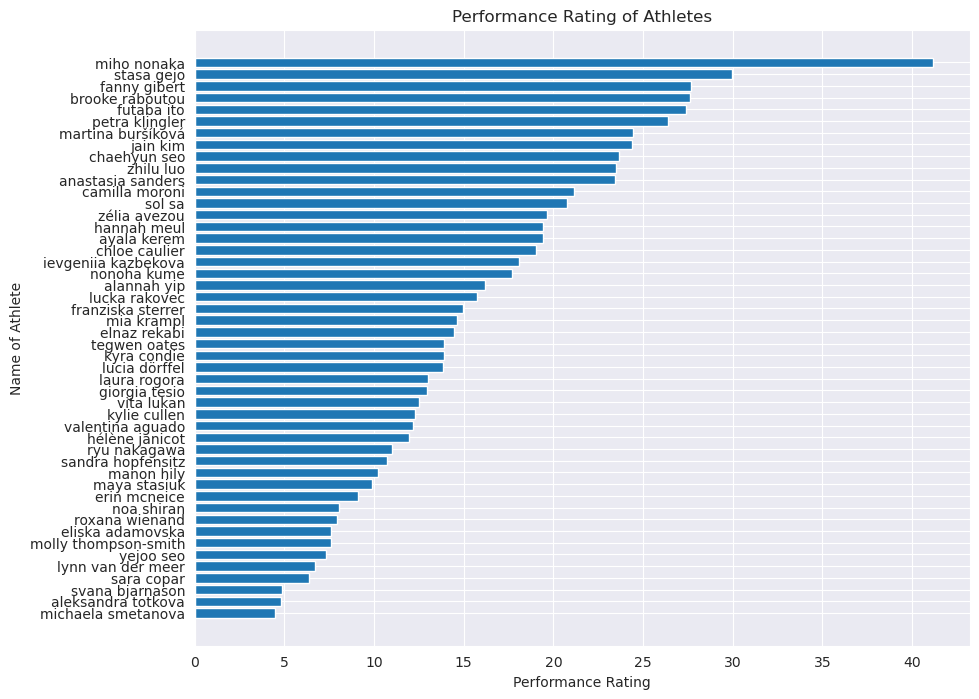

In [336]:
import matplotlib.pyplot as plt

# Assuming df_climbers_ultimate_stats is already defined and contains the 'performance rating'

# Sort the DataFrame by 'performance rating' to make the chart more informative
df_sorted = df_names_ratings.sort_values('performance rating', ascending=True)

# Create a bar chart
plt.figure(figsize=(10, 8))  # Adjust the size as needed
plt.barh(df_sorted['name'], df_sorted['performance rating'])  # Horizontal bar chart
plt.xlabel('Performance Rating')
plt.ylabel('Name of Athlete')
plt.title('Performance Rating of Athletes')
plt.show()

Step 3: Feature Selection : 
Now let's test the models by having them work with the features that make up the athlete's performance rating score according to experts views on it.
Defining the features and target for the model: The selected_features list specifies which columns in the dataset are used as input features for the model. The target variable y is set to the performance rating, which the model will try to predict.

Step 4: Train-Test Split
Spliting the data into training and testing sets: This step uses train_test_split to divide the dataset into a training set (70% of the data) and a testing set (30% of the data). This allows the model to learn from the training set and then be evaluated on the testing set, which helps assess its performance on unseen data.

Step 5: Model Training 
Initializing and training a Gradient Boosting Regressor: The GradientBoostingRegressor is a machine learning model that uses gradient boosting to predict continuous values, in this case, the performance rating. The model is trained using the features (X_train) and target values (y_train) from the training set.

Step 6: Prediction and Ranking
Predicts performance ratings for all climbers: After training, the model predicts the performance ratings for the entire dataset (X) to assess how each climber is expected to perform.
Creates a DataFrame with predictions and names: A new DataFrame predictions_df is created, containing each climber's name and their predicted performance rating.
Sorts climbers by predicted performance: This DataFrame is then sorted in descending order of predicted_rating to rank the climbers based on their predicted performance.
Identifies the top 5 climbers: The top 5 climbers, according to the model's predictions, are extracted for display.

Displays the names and predicted ratings of the top 5 climbers: Finally, the code prints the names and predicted ratings of the top 5 climbers, providing insight into which climbers the model predicts will have the highest performance ratings.

In [337]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd

# Adjust 'average attempts per top all time' so that a higher value is better
df_climbers_ultimate_stats['inverted_attempts_per_top'] = 1 / df_climbers_ultimate_stats['average attempts per top all time']

# Select features for the model and the target variable
selected_features = ['extended podiums', 'top percentage all time', 'inverted_attempts_per_top', 'competition experience', 'semi-final percentage', 'final percentage', 'recent performance score']
X = df_climbers_ultimate_stats[selected_features]
y = df_climbers_ultimate_stats['performance rating']  # target column

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Train the model on the training set
gb_regressor.fit(X_train, y_train)

# Predict the performance ratings on the full dataset for all climbers
y_pred_full = gb_regressor.predict(X)

# Create a DataFrame with predicted ratings and climbers' names
predictions_df = pd.DataFrame({
    'name': df_climbers_ultimate_stats['name'],
    'predicted_rating': y_pred_full
})

# Rank the climbers based on predicted performance ratings
predictions_df_sorted = predictions_df.sort_values(by='predicted_rating', ascending=False)

# Extract the top 5 predicted climbers based on rating
top_15_climbers_predicted = predictions_df_sorted.head(35)

# Print the names and predicted ratings of the top 5 climbers
print(top_15_climbers_predicted)

                   name  predicted_rating
30          miho nonaka         41.155653
4       brooke raboutou         33.345358
11         fanny gibert         27.630007
40           stasa gejo         27.575056
13           futaba ito         27.389159
34       petra klingler         26.375812
18             jain kim         24.349482
46            zhilu luo         23.539050
2     anastasia sanders         23.422695
6          chaehyun seo         22.777246
39               sol sa         21.467753
3           ayala kerem         21.309966
5        camilla moroni         21.193604
47         zélia avezou         19.588945
15          hannah meul         19.390526
7         chloe caulier         19.054754
43     valentina aguado         18.108373
17  ievgeniia kazbekova         18.105540
0           alannah yip         16.146938
26    martina buršíková         16.117636
23        lucka rakovec         15.716895
33          nonoha kume         14.773646
28           mia krampl         14

vs. 'performance rating' results
41.164944
29.970489
27.650216
27.598710
27.387914
26.387642
24.429516
24.357500
23.636880
23.499093

Could it be DATA LEAKAGE?
 Very close predictions could also be a sign of data leakage, where information from the target variable is inadvertently included in the features, allowing the model to cheat by using this information. This can happen if one of the features directly correlates with the target variable due to how the data was collected or processed.
**the weight of the variables that were used in the model was not included, so is it really?**


In [338]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Adjust 'average attempts per top all time' so that a higher value is better
df_climbers_ultimate_stats['inverted_attempts_per_top'] = 1 / df_climbers_ultimate_stats['average attempts per top all time']

# Select features for the model and the target variable
selected_features = ['extended podiums', 'top percentage all time', 'inverted_attempts_per_top', 'competition experience', 'semi-final percentage', 'final percentage', 'recent performance score']
X = df_climbers_ultimate_stats[selected_features]
y = df_climbers_ultimate_stats['performance rating']  # target column

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model on the training set
rf_regressor.fit(X_train, y_train)

# Predict the performance ratings on the full dataset for all climbers
y_pred_full = rf_regressor.predict(X)

# Create a DataFrame with predicted ratings and climbers' names
predictions_df = pd.DataFrame({
    'name': df_climbers_ultimate_stats['name'],
    'predicted_rating': y_pred_full
})

# Rank the climbers based on predicted performance ratings
predictions_df_sorted = predictions_df.sort_values(by='predicted_rating', ascending=False)

# Extract the top 10 predicted climbers based on rating
top_10_climbers_predicted = predictions_df_sorted.head(10)

# Print the names and predicted ratings of the top 10 climbers
print(top_10_climbers_predicted)

                 name  predicted_rating
30        miho nonaka         35.078876
4     brooke raboutou         27.563324
11       fanny gibert         26.798975
13         futaba ito         26.787053
40         stasa gejo         26.269919
34     petra klingler         25.490121
18           jain kim         24.632626
46          zhilu luo         22.530251
2   anastasia sanders         22.109936
6        chaehyun seo         21.573666


In [339]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pandas as pd

# Adjust 'average attempts per top all time' so that a higher value is better
df_climbers_ultimate_stats['inverted_attempts_per_top'] = 1 / df_climbers_ultimate_stats['average attempts per top all time']

# Select features for the model and the target variable
selected_features = ['extended podiums', 'top percentage all time', 'inverted_attempts_per_top', 'competition experience', 'semi-final percentage', 'final percentage', 'recent performance score']
X = df_climbers_ultimate_stats[selected_features]
y = df_climbers_ultimate_stats['performance rating']  # target column

# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                                 max_depth = 5, alpha = 10, n_estimators = 100, random_state=42)  # Example hyperparameters

# Train the model on the training set
xgb_regressor.fit(X_train, y_train)

# Predict the performance ratings on the full dataset for all climbers
y_pred_full = xgb_regressor.predict(X)

# Create a DataFrame with predicted ratings and climbers' names
predictions_df = pd.DataFrame({
    'name': df_climbers_ultimate_stats['name'],
    'predicted_rating': y_pred_full
})

# Rank the climbers based on predicted performance ratings
predictions_df_sorted = predictions_df.sort_values(by='predicted_rating', ascending=False)

# Extract the top 10 predicted climbers based on rating
top_10_climbers_predicted = predictions_df_sorted.head(10)

# Print the names and predicted ratings of the top 10 climbers
print(top_10_climbers_predicted)

                 name  predicted_rating
30        miho nonaka         30.985245
13         futaba ito         27.690512
11       fanny gibert         27.654451
40         stasa gejo         27.009560
34     petra klingler         26.322090
4     brooke raboutou         25.830250
18           jain kim         24.308205
46          zhilu luo         23.828783
2   anastasia sanders         23.216169
6        chaehyun seo         22.259272


In [340]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to evaluate the model
def evaluate_model(model_name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return {
        'Model': model_name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R^2 Score': r2
    }

# Assuming you have models named as follows: gb_regressor, rf_regressor, xgb_regressor
models = {
    'Gradient Boosting Regressor': gb_regressor,
    'Random Forest Regressor': rf_regressor,
    'XGBoost Regressor': xgb_regressor
}

# Evaluate each model
results = [evaluate_model(name, model, X_test, y_test) for name, model in models.items()]

# Convert the results into a DataFrame for nice formatting
import pandas as pd
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


                         Model       MAE        MSE      RMSE  R^2 Score
0  Gradient Boosting Regressor  2.379115  11.034377  3.321803   0.786831
1      Random Forest Regressor  1.999732   8.322435  2.884863   0.839222
2            XGBoost Regressor  1.490171   3.615440  1.901431   0.930155


In [341]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import numpy as np

# Suponiendo que X e y son tus características y etiquetas respectivamente
X = df_climbers_ultimate_stats[selected_features]
y = df_climbers_ultimate_stats['performance rating']

# Configura el método K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lista para guardar los modelos
models = {
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "XGBoost Regressor": xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
}

# Ejecuta la validación cruzada para cada modelo
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)

    print(f"{name}: RMSE average: {np.mean(rmse_scores):.2f}, with standard deviation: {np.std(rmse_scores):.2f}")

Random Forest Regressor: RMSE average: 2.49, with standard deviation: 1.35
Gradient Boosting Regressor: RMSE average: 2.56, with standard deviation: 0.93
XGBoost Regressor: RMSE average: 2.85, with standard deviation: 1.48


The end will be found in the presentation:  
Presentation link: https://www.canva.com/design/DAF7i7UZWds/RbbPpgspsZ8LlLLEwGfVtw/view?utm_content=DAF7i7UZWds&utm_campaign=designshare&utm_medium=link&utm_source=editor
